# Week 4 - Exploring Semantic Spaces (Word Embeddings)
This week, we build on last week's topic modeling techniques by taking a text corpus we have developed, specifying an underlying number of dimensions, and training a model with a neural network auto-encoder (one of Google's word2vec  algorithms) that best describes corpus words in their local linguistic contexts, and exploring their locations in the resulting space to learn about the discursive culture that produced them.

This is our third document representation we have learned: First, we used word counts. Second, we used LDA topic models built around term coocurrence in the same document (i.e., a "bag of words"). Third, documents here are represented as densely indexed locations in dimensions, so that distances between those documents (and words) contain more information, though they require the full vector of dimension loadings (rather than just a few selected topic loadings) to describe. We will explore these spaces to understand complex, semantic relationships between words, index documents with descriptive words, identify the likelihood that a given document would have been produced by a given vector model, and explore how semantic categories can help us understand the cultures that produced them.

Note that most modern natural language processing (NLP) research, at least in computer science, uses word embeddings. This is the foundation of most state-of-the-art models.

Also note that the code in this Notebook can take many minutes or even hours to run. This is the case for most NLP research these days, and it's a good opportunity to start thinking about how to manage high-compute workloads, such as running code on small samples to test it, loading datafiles in [chunks](https://stackoverflow.com/a/25962187), or [multiprocessing](https://en.wikipedia.org/wiki/Multiprocessing).

## <font color="red">*Pitch Your Project*</font>

<font color="red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?***
The focus of this analysis is on the expression of burnout in social media discourse, particularly following significant societal events like pandemics and economic crises. The hypothesis posits a rise and also have different expression topics in burnout-related discourse on platforms like Reddit and Weibo, especially in the aftermath of such global challenges. The study will analyze a five-year span of posts, with particular attention to periods succeeding major events like the onset of the COVID-19 pandemic. This investigation seeks to uncover the extent to which these platforms serve as barometers for public sentiment on burnout, especially in times of widespread social and economic stress.
## ***Why?***
 Social media platforms often reflect collective experiences and reactions to societal events. Given the global challenges in recent years, such as the COVID-19 pandemic and various economic downturns, it is plausible that individuals increasingly turn to these platforms to express their feelings of burnout. The anonymity and reach of social media also make it a likely outlet for people to share their struggles with burnout, which might not be as openly discussed in offline settings.
## ***How?***
Extract posts from Twitter and Weibo spanning the past five years, focusing on periods following major events.
Use sentiment analysis to identify and categorize expressions of burnout.
Compare frequency and intensity of burnout expressions over time, particularly pre- and post-major events.
Compare the difference in expression content.
Contrast findings across different platforms (Reddit vs. Weibo) to understand cultural or platform-specific variations.
## <font color="red">*Pitch Your Sample*</font>


<font color="red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***
The sample for this study comprises posts from english social media:Reddit,Twitter X and chinese social media Weibo,xiao hong shu, chosen for their diverse user bases and their potential to reflect different cultural responses to stress and burnout. This selection allows for a comparative analysis of burnout expressions across different socio-cultural contexts.

Virtues: This sample offers a broad, diverse dataset that can yield insights into public sentiment across different regions and cultures.

Limitations: The sample may not fully represent offline sentiments or those of individuals who do not use these platforms. Language barriers and platform-specific discourse styles might also impact the analysis. Also Twitter X need cost so much money! no funding!

Alternatives: Including additional platforms could provide a more comprehensive view.

Scaling Up: For further research or high-profile publication, the study could incorporate a larger dataset, extend the time frame, include more platforms.

In [ ]:
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-06xgqq3f
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-06xgqq3f
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

# Getting our corpora

Instead of downloading our corpora, we have download them in advance; a subset of the [senate press releases](https://github.com/lintool/GrimmerSenatePressReleases) are in `grimmerPressReleases`. We will load them into a DataFrame, but first we need to define a function to convert directories of text files into DataFrames:

In [ ]:
def loadDir(targetDir, category):
    allFileNames = os.listdir(targetDir)
    #We need to make them into usable paths and filter out hidden files
    filePaths = [os.path.join(targetDir, fname) for fname in allFileNames if fname[0] != '.']

    #The dict that will become the DataFrame
    senDict = {
        'category' : [category] * len(filePaths),
        'filePath' : [],
        'text' : [],
    }

    for fPath in filePaths:
        with open(fPath) as f:
# Try this line instead if you get an encoding error.
#         with open(fPath, encoding="ISO-8859-1") as f:
            senDict['text'].append(f.read())
            senDict['filePath'].append(fPath)

    return pd.DataFrame(senDict)

In [ ]:
# Here I mount google drive. I stored all the data in the drive so I can extract data file directly from there. If you don't want to use the drive,
# you can always upload the data to /content/ directly.
# We recommend drive for the larger datasets.

from google.colab import drive
drive.mount("/content/gdrive")
# os.chdir('/content/drive/MyDrive/TA_file_2024_CCA')

Mounted at /content/gdrive


Now we can use the function in all the directories in `data/grimmerPressReleases`. If you are on Google Colab, note that rather than downloading GitHub data to your local machine and then uploading it to Drive, you can more quickly `git clone` directly to Colab, such as `!git clone https://github.com/lintool/GrimmerSenatePressReleases.git /drive/MyDrive/`, which then makes your `dataDir = 'drive/MyDrive/grimmerPressReleases/raw'`.

In [ ]:
!git clone https://github.com/lintool/GrimmerSenatePressReleases.git /gdrive/MyDrive/grimmerPressReleases

Cloning into '/gdrive/MyDrive/grimmerPressReleases'...
remote: Enumerating objects: 72693, done.
remote: Total 72693 (delta 0), reused 0 (delta 0), pack-reused 72693
Receiving objects: 100% (72693/72693), 95.17 MiB | 14.20 MiB/s, done.
Resolving deltas: 100% (2642/2642), done.
Updating files: 100% (72788/72788), done.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dataDir = '/content/gdrive/MyDrive/grimmerPressReleases/raw'
# dataDir = 'grimmerPressReleases/grimmerPressReleases'

senReleasesDF = pd.DataFrame()

for senatorName in [d for d in os.listdir(dataDir) if d[0] != '.']:
    senPath = os.path.join(dataDir, senatorName)
    try:
        # Append the loaded data to the DataFrame, ignoring the index
        senReleasesDF = senReleasesDF.append(loadDir(senPath, senatorName), ignore_index=True)
    except UnicodeDecodeError as e:
        # Print an error message and the name of the file causing the error
        print(f"Error decoding file {senPath}: {e}")

senReleasesDF[:100:10]

NotADirectoryError: [Errno 20] Not a directory: '/content/gdrive/MyDrive/60000/burnoutcombined_csv.csv'

Word2Vec needs to retain the sentence structure so as to capture a "continuous bag of words (CBOW)" and all of the skip-grams within a word window. The algorithm tries to preserve the distances induced by one of these two local structures. This is very different from clustering and LDA topic modeling which extract unordered words alone.

When we normalize here, we don't use the lematized form of the word because we might lose information. Note the paramter in the normalize tokens function.

In [ ]:
#Apply our functions, notice each row is a list of lists now
from tqdm import tqdm
tqdm.pandas()

senReleasesDF['tokenized_sents'] = senReleasesDF['text'].progress_apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
# With the latest spacy versions, you may get warnings with the following line of code. See the discussion here: https://github.com/allenai/allennlp/issues/5036
# senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

senReleasesDF[:100:10]

100%|██████████| 3904/3904 [08:03<00:00,  8.08it/s]
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


category                                           filePath  \
0     Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
10    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
20    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
30    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
40    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
50    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
60    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
70    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
80    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   
90    Kerry  grimmerPressReleases/grimmerPressReleases/Kerr...   

                                                 text  \
0          Releases                               ...   
10         Releases                               ...   
20         Releases                               ...   
30         Releases                               ...   
40         Releases                               ...   
50         Releases                               ...   
60         Releases                               ...   
70         Releases                               ...   
80         Releases                               ...   
90         Releases                               ...   

                                      tokenized_sents  \
0   [[Releases, 08, 09, 2005], [John, Kerry, Says,...   
10  [[Releases, 01, 19, 2006, Statement, by, Senat...   
20  [[Releases, 10, 04, 2007, Kerry, Honors, Bille...   
30  [[Releases, 10, 23, 2007, Senators, Kerry, Ken...   
40  [[Releases, 03, 29, 2005, Leading, health, car...   
50  [[Releases, 03, 02, 2005, Working, to, Strenth...   
60  [[Releases, 05, 31, 2005, Statement, from, Joh...   
70  [[Releases, 09, 27, 2007, Kerry, Kennedy, anno...   
80  [[Releases, 08, 01, 2005, Statement, by, John,...   
90  [[Releases, 11, 01, 2007, Kerry, Statement, on...   

                                     normalized_sents  
0   [[releases], [john, kerry, says, energy, polic...  
10  [[releases, statement, senator, john, kerry, k...  
20  [[releases, kerry, honors, billerica, woman, a...  
30  [[releases, senators, kerry, kennedy, salazar,...  
40  [[releases, leading, health, care, children, s...  
50  [[releases, working, strenthen, american, mili...  
60  [[releases, statement, john, kerry, governor, ...  
70  [[releases, kerry, kennedy, announce, billeric...  
80  [[releases, statement, john, kerry, recess, ap...  
90  [[releases, kerry, statement, mukasey, nominat...

# Word2Vec

We will be using the gensim implementation of [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec). Note that newer versions of gensim have different syntax, but if you're using a newer version, you should see informative error messages (e.g., replace `senReleasesW2V['president'][:10]` with `senReleasesW2V['president'].wv[:10]`). The following lines should work out-of-the-box on Google Colab.

To load our data our data we give all the sentences to the trainer:

In [ ]:
# The sg=0 argument indicates that we don't want to use "skipgram" but instead "CBOW"
senReleasesW2V = gensim.models.word2vec.Word2Vec(senReleasesDF['normalized_sents'].sum(), sg=0)

Inside the word2vec object, each word has a vector. To access the vector directly, use the square braces (`__getitem__`) method:

In [ ]:
senReleasesW2V.wv['president'][:10] #Shortening because it's very large

array([-2.914853  , -0.35330814, -0.6453861 , -2.8731003 ,  2.14102   ,
        0.78152764, -0.8469779 ,  0.45678326, -2.3338232 ,  2.4808023 ],
      dtype=float32)

If you want the full matrix, `syn0` stores all the vectors:

In [ ]:
senReleasesW2V.wv.vectors

array([[ 4.0722853e-01,  7.7914441e-01,  1.5935795e+00, ...,
        -1.7770790e+00,  4.6485770e-01,  8.6101502e-01],
       [-4.8572958e-01, -6.4862645e-01,  1.0653816e+00, ...,
        -8.4975326e-01, -7.8026962e-01, -1.3037756e-01],
       [-7.5451769e-02, -2.8315139e-01, -1.0252775e+00, ...,
        -4.8215795e-01,  2.3628895e+00,  5.6145573e-01],
       ...,
       [-1.3535589e-01,  2.9870862e-02,  4.4650625e-02, ...,
        -6.6517942e-02,  1.1277579e-03,  1.2661597e-01],
       [-2.5809275e-02,  3.1026212e-02,  3.2309644e-02, ...,
        -3.9076198e-02,  7.7305883e-03,  7.0386447e-02],
       [-5.1991539e-03,  2.7285300e-02,  4.4292949e-02, ...,
        -1.5136875e-03, -1.8800158e-02,  3.9049923e-02]], dtype=float32)

Then, `index2word` lets you translate from the matrix to words:

In [ ]:
senReleasesW2V.wv.index_to_key[10]

'american'

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [ ]:
senReleasesW2V.wv.most_similar('president')

[('administration', 0.7762889862060547),
 ('presidents', 0.7548879384994507),
 ('administrations', 0.695731520652771),
 ('cheney', 0.638484537601471),
 ('linean', 0.5703231692314148),
 ('veto', 0.5696533918380737),
 ('ronald', 0.5443770885467529),
 ('quoting', 0.5377044081687927),
 ('rollback', 0.5196364521980286),
 ('george', 0.5150631070137024)]

In [ ]:
senReleasesW2V.wv.most_similar('war')

[('wars', 0.6631708741188049),
 ('foment', 0.6407153010368347),
 ('afghanistan', 0.63011234998703),
 ('disobedience', 0.628577470779419),
 ('unresisted', 0.6222046613693237),
 ('chaos', 0.610602080821991),
 ('sliding', 0.6074034571647644),
 ('democratization', 0.6028963327407837),
 ('militarily', 0.5897342562675476),
 ('invasion', 0.5866850018501282)]

Find which word least matches the others within a word set (cosine similarity):

In [ ]:
senReleasesW2V.wv.doesnt_match(['administration', 'administrations', 'presidents', 'president', 'washington'])

'washington'

Find which word best matches the result of a semantic *equation* (here, we seek the words whose vectors best fit the missing entry from the equation: **X + Y - Z = _**.

In [ ]:
senReleasesW2V.wv.most_similar(positive=['clinton', 'republican'], negative = ['democrat'])

[('vetoed', 0.7010154724121094),
 ('bush', 0.629135251045227),
 ('blocked', 0.6187847256660461),
 ('lyndon', 0.6135330200195312),
 ('veto', 0.6134244203567505),
 ('signed', 0.6046305894851685),
 ('signature', 0.568667471408844),
 ('proposing', 0.5685528516769409),
 ('roosevelt', 0.5663424730300903),
 ('bushs', 0.5614659786224365)]

Here we see that **Clinton + Republican - Democrat = Bush**. In other words, in this dataset, **Clinton** is to **Democrat** as **Bush** is to **Republican**. Whoah!

We can also save the vectors for later use:

In [ ]:
senReleasesW2V.save("senpressreleasesWORD2Vec")

We can also use dimension reduction to visulize the vectors. We will start by selecting a subset we want to plot. Let's look at the top words from the set:

In [ ]:
numWords = 50
targetWords = senReleasesW2V.wv.index_to_key[:numWords]

We can then extract their vectors and create our own smaller matrix that preserved the distances from the original:

In [ ]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(senReleasesW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.40722853,  0.7791444 ,  1.5935795 , ..., -1.777079  ,
         0.4648577 ,  0.861015  ],
       [-0.48572958, -0.64862645,  1.0653816 , ..., -0.84975326,
        -0.7802696 , -0.13037756],
       [-0.07545177, -0.2831514 , -1.0252775 , ..., -0.48215795,
         2.3628895 ,  0.5614557 ],
       ...,
       [-0.8547245 , -0.8046068 ,  0.9059412 , ...,  0.84257865,
         2.0484028 , -0.3741436 ],
       [ 0.01460662, -0.84940517, -0.06637333, ..., -0.46638152,
        -0.10634682, -0.19813927],
       [ 1.3713497 , -2.5031455 , -0.7722239 , ...,  1.7862204 ,
         0.46711865,  0.23951748]], dtype=float32)

Then we can use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words:

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

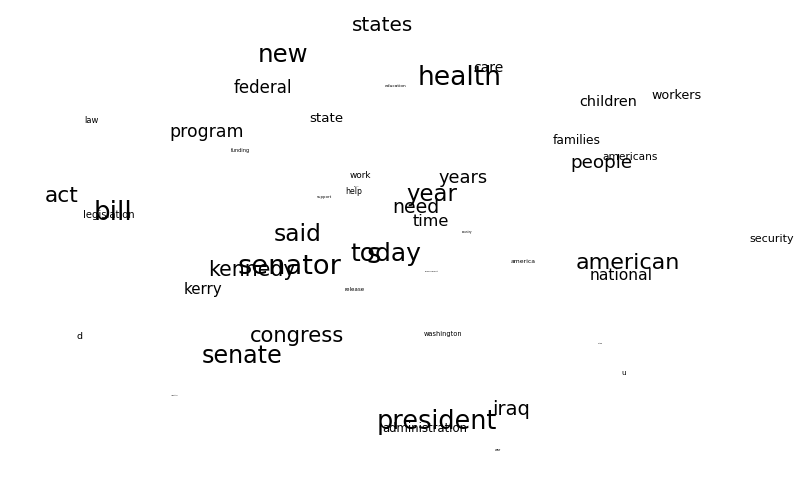

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

My visualization above puts ``said`` next to ``congress`` and ``bill`` near ``act``. ``health`` is beside ``care`` and ``national`` abuts ``security``.

## Adding more context - FastText

Since the original word2vec paper, there have followed a slew of word embedding related methods which innovate and build on them in many ways. One popular extension is FastText ([Bojanowski et al. 2017](https://arxiv.org/abs/1607.04606)), which uses sub-words to generate its vectors. Using subwords means that it is powerful in dealing with unknown words and sparse languages that otherwise have a rich morphological structure. These sub-words are incorporated into the previously skipgram and CBOW methods. For example, if the word is “which”, it is represented as the word itself along with a bag of constituent n-grams. If n=3, the representation looks like <wh, whi, hic, ich, ch>, and we learn a representation for each of these constituents, with the word “which” taking on the average value of these constituents.

FastText can be used either via Gensim or the official package, and primarily has two functions - word representations, and text classification (Joulin et al. 2017). See below for code using the FastText package for playing with word representations, taken from their word representations tutorial (https://fasttext.cc/docs/en/unsupervised-tutorial.html).


In [ ]:
! pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199776 sha256=ee5f0b798bc7ca8430d5dffea88c228fe6cafe8905212b9ee68a504c11fcbe12
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


### Representations with FastText

We will follow the instructions in the FastText tutorial to prepare our data, (Wikipedia). You can either follow the instructions on the page for setting the data, or download/copy it to drive it from this [Google Drive link](https://drive.google.com/file/d/12T3nNzf0a7tdhm1lVyfz9Ix9XVITFMCP/view?usp=sharing).

In this example, we will be training a model - it is also possible to download and use the many pre-trained models.

In [ ]:
import fasttext

In [ ]:
# Replace with the path for where you have placed the 'fil9' file.
file_address = "fil9"

In [ ]:
model = fasttext.train_unsupervised(file_address, minCount=200, epoch=1)

While FastText is running, the progress and estimated time to completion is shown on your screen. Once the training finishes, the model variable contains information on the trained model, which you can use for querying:



In [ ]:
model.words

['the',
 'of',
 'and',
 'in',
 'a',
 'to',
 'is',
 'The',
 'are',
 'for',
 'was',
 'as',
 'with',
 'by',
 'from',
 'that',
 'on',
 'or',
 'at',
 'an',
 'his',
 'have',
 'which',
 'it',
 'In',
 'be',
 'age',
 'also',
 'he',
 'has',
 'were',
 'not',
 'who',
 'had',
 'population',
 'this',
 'but',
 'km',
 'other',
 'there',
 'their',
 'one',
 'under',
 'A',
 'more',
 '18',
 'its',
 'all',
 'living',
 'first',
 'two',
 'income',
 'median',
 'been',
 'It',
 'out',
 'total',
 'United',
 'can',
 'For',
 'years',
 'they',
 'This',
 'He',
 'into',
 'There',
 'most',
 'city',
 'average',
 'As',
 'such',
 'used',
 '65',
 'some',
 'up',
 'no',
 'mi.',
 'New',
 'those',
 'many',
 'only',
 'made',
 'after',
 'than',
 'would',
 'when',
 'American',
 'family',
 'area',
 'any',
 'every',
 'States',
 'town',
 '100',
 'known',
 'links',
 'External',
 'her',
 'about',
 'County,',
 'located',
 'size',
 'below',
 'may',
 'between',
 'over',
 'time',
 '1',
 'families',
 'density',
 'line.',
 'called',
 'hous

It returns all words in the vocabulary, sorted by decreasing frequency. We can get the word vector by:



In [ ]:
model.get_word_vector("the")

array([ 1.01263069e-01, -5.90192489e-02,  1.61868244e-01, -1.01701789e-01,
        2.11401746e-01,  3.44076864e-02,  1.06779106e-01, -7.01764673e-02,
       -2.77115434e-01, -3.33278567e-01, -2.25600272e-01,  2.84197815e-02,
        4.64334451e-02, -3.16535458e-02,  1.81303080e-02,  4.28940691e-02,
        1.87967479e-01, -2.95054838e-02,  7.59627223e-02,  2.25423761e-02,
        1.01923592e-01, -3.57791893e-02,  1.26660556e-01, -6.02674000e-02,
        7.77557120e-02,  2.25575492e-01,  3.91170114e-01,  2.25593746e-01,
       -2.84654528e-01, -9.91142765e-02,  6.44938052e-02,  2.01031938e-01,
       -6.81440681e-02, -1.06424704e-01,  4.65644971e-02,  1.19772151e-01,
       -6.29343688e-02,  3.63371581e-01,  4.77561578e-02,  6.11040592e-02,
       -8.36888999e-02, -4.58102636e-02, -1.21765435e-01,  9.46124494e-02,
        2.85717428e-01, -1.05698608e-01,  4.03688736e-02,  1.54146299e-01,
       -1.79450721e-01, -9.32932720e-02,  7.56328460e-03, -1.15344204e-01,
        1.28116474e-01,  

In [ ]:
model.save_model("fil9.bin")

In [ ]:
# when we want to use the model again
model = fasttext.load_model("fil9.bin")

Let's now print some vectors.

In [ ]:
[model.get_word_vector(x) for x in ["asparagus", "pidgey", "yellow"]]

[array([-0.14006662, -0.07485355,  0.319586  , -0.04093548,  0.09198429,
         0.1261278 , -0.03269082, -0.11055066,  0.04655714, -0.1326036 ,
        -0.04546691, -0.25087675,  0.18515807,  0.14625898, -0.06811476,
         0.05070682,  0.17836626,  0.04091097, -0.08842913,  0.151132  ,
         0.06338568, -0.17596854, -0.07060655,  0.1902626 , -0.0789043 ,
         0.03498681,  0.43267778,  0.12663811, -0.14121874, -0.0656484 ,
         0.05628384,  0.25708377,  0.20422208, -0.03867839,  0.10115422,
        -0.02700523, -0.11787999,  0.32505086, -0.05171636,  0.136551  ,
        -0.17223425,  0.25701734, -0.22905089, -0.04056008,  0.0833502 ,
         0.15513909,  0.37595323, -0.04926715, -0.15345646,  0.21379124,
        -0.18380232,  0.01716743, -0.1489495 , -0.15657601,  0.26150805,
        -0.14652215,  0.04858861,  0.3603034 , -0.06512161,  0.16244695,
         0.00835189, -0.01089688,  0.4704638 , -0.09488831, -0.06462533,
         0.3277814 ,  0.16953354, -0.04525212, -0.0

A nice feature is that you can also query for words that did not appear in your data! Indeed words are represented by the sum of their substrings. As long as the unknown word is made of known substrings, there is a representation of it!

As an example let's try with a misspelled word:



In [ ]:
model.get_word_vector("enviroment")

array([-2.70548295e-02,  1.50540456e-01,  2.53648639e-01, -4.23338339e-02,
        1.38390139e-01,  1.23571225e-01, -3.33544403e-01, -3.00642520e-01,
       -5.74875437e-02,  4.31564808e-01, -2.16350675e-01, -1.72045216e-01,
        6.48741424e-02,  4.55947854e-02,  1.11958481e-01, -1.84667960e-01,
        3.20180207e-01, -2.58245885e-01, -5.46172746e-02, -1.11285992e-01,
        2.84395278e-01, -2.85696507e-01, -7.29190707e-02,  1.13132909e-01,
        1.05610386e-01,  2.34497786e-01,  4.10215378e-01,  2.38320827e-01,
       -1.79288089e-01, -5.25667548e-01,  1.53210200e-02,  1.14100046e-01,
        1.30865082e-01, -4.06445339e-02,  6.67985082e-02, -4.82941747e-01,
       -1.17705710e-01,  1.97724909e-01,  2.43855476e-01,  2.99321171e-02,
       -2.99975365e-01,  2.00883836e-01, -1.07507303e-01,  3.99979770e-01,
        2.07314998e-01,  5.43931544e-01, -9.83017087e-02,  2.69692481e-01,
       -2.01667085e-01, -1.80381555e-02,  1.18486591e-01,  1.65626518e-02,
        1.53593928e-01, -

In [ ]:
# Add FastText here

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec` and/or `fasttext`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why?

<font color="red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/MyDrive/60000/burnoutcombined_csv.csv'

In [ ]:
try:
    # Attempt to read the CSV file with utf-8 encoding
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    # If there's an encoding error, try reading with 'latin1' encoding
    df = pd.read_csv(file_path, encoding='latin1')

# Now df holds the contents of the CSV file as a DataFrame
df.head()  # Print the first 5 rows of the DataFrame

selftext  \
0  Hello fellow antiworkers, I just wanted to sha...   
1  Anne Helen Peterson writes for Buzzfeed and ho...   
2  I'll be frank, I'm probably older than a lot o...   
3  I'm seriously burned out at work, which I've b...   
4  Well, actually it's Not l as simple as work ma...   

                                               title  score  is_self  \
0                     Sooo tired and want to quit...     20     True   
1  I have a feeling this essay will be meaningful...     15     True   
2  What makes you hate work? What were you doing ...     52     True   
3             Burned out, suicidal and about to snap     33     True   
4  Suicidal from working or am I just a trash human?    101     True   

  created_utc_converted      id          author  num_comments  \
0   2018-11-28 17:59:12  a18lsu     on_the_mike            15   
1   2019-01-07 14:50:17  adico2  unhappypatient             2   
2   2019-01-10 19:07:02  aem94t  unhappypatient            49   
3   2019-01-31 06:42:45  alms99    throwavpdway            10   
4   2019-02-04 08:20:16  amzoi6       Necturion            22   

                                                 url  Burnout evaluation  
0  https://www.reddit.com/r/antiwork/comments/a18...                 1.0  
1  https://www.reddit.com/r/antiwork/comments/adi...                 1.0  
2  https://www.reddit.com/r/antiwork/comments/aem...                 1.0  
3  https://www.reddit.com/r/antiwork/comments/alm...                 1.0  
4  https://www.reddit.com/r/antiwork/comments/amz...                 1.0

In [ ]:
BurnoutDF = df

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
#Apply our functions, notice each row is a list of lists now
from tqdm import tqdm
tqdm.pandas()

BurnoutDF['tokenized_sents'] = BurnoutDF['selftext'].progress_apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
BurnoutDF['normalized_sents'] = BurnoutDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
# With the latest spacy versions, you may get warnings with the following line of code. See the discussion here: https://github.com/allenai/allennlp/issues/5036
# BurnoutDF['normalized_sents'] = BurnoutDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

  0%|          | 0/8985 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 8985/8985 [25:22<00:00,  5.90it/s]


In [ ]:
BurnoutDF[:100:10]

selftext  \
0   Hello fellow antiworkers, I just wanted to sha...   
10  #How to Drop Out\n\noriginal 2004 essay\n\nI d...   
20   \n\nHello fellow antiwork comrades. This is g...   
30  I’m pretty burnt out from work these past few ...   
40  * I've reached a career breaking point.. I'm s...   
50  I'm only 23 and I've been working as a softwar...   
60  \nEDIT: In the title I say 10% of income. This...   
70  Thought y’all might appreciate a positive stor...   
80  I feel like I always start off strong in a new...   
90  I'm new at my job at IT helpdesk and I thought...   

                                                title  score  is_self  \
0                      Sooo tired and want to quit...     20     True   
10  How to Drop Out. one of the modern foundationa...     33     True   
20                                Toxic Environments?     22     True   
30  I don’t feel well but my boss still wants me t...     11     True   
40  Call me cynical if you want but is anybody els...     95     True   
50  I have to find a job again and I'm fretting ov...     45     True   
60  If the top 400 richest people in America donat...    242     True   
70     I work for a non-profit; it’s fucking awesome.     16     True   
80  Anyone else have the habit of burning out of j...    234     True   
90                           Why am I such and idiot?     12     True   

   created_utc_converted      id             author  num_comments  \
0    2018-11-28 17:59:12  a18lsu        on_the_mike            15   
10   2019-03-30 19:50:41  b7f88g   MakeTotalDestr0i            10   
20   2019-06-19 15:25:26  c2ifjo       nuka_girl111             7   
30   2019-08-13 17:57:20  cpws37         jeremybeau             9   
40   2019-10-14 21:26:41  dhxecc          [deleted]            15   
50   2019-12-14 20:10:09  eaomcr  SimilarSomewhere_            31   
60   2020-01-17 07:11:34  epx1ii  dontreadmycommemt            13   
70   2020-02-29 20:23:48  fbih8b            saucity            13   
80   2020-04-22 01:34:42  g5s6qf          DavidvonR            76   
90   2020-05-20 11:45:25  gn9vcm          weedarbie            12   

                                                  url  Burnout evaluation  \
0   https://www.reddit.com/r/antiwork/comments/a18...                 1.0   
10  https://www.reddit.com/r/antiwork/comments/b7f...                 1.0   
20  https://www.reddit.com/r/antiwork/comments/c2i...                 1.0   
30  https://www.reddit.com/r/antiwork/comments/cpw...                 1.0   
40  https://www.reddit.com/r/antiwork/comments/dhx...                 1.0   
50  https://www.reddit.com/r/antiwork/comments/eao...                 1.0   
60  https://www.reddit.com/r/antiwork/comments/epx...                 1.0   
70  https://www.reddit.com/r/antiwork/comments/fbi...                 1.0   
80  https://www.reddit.com/r/antiwork/comments/g5s...                 1.0   
90  https://www.reddit.com/r/antiwork/comments/gn9...                 1.0   

                                      tokenized_sents  \
0   [[Hello, fellow, antiworkers, I, just, wanted,...   
10  [[How, to, Drop, Out, original, 2004, essay, I...   
20  [[Hello, fellow, antiwork, comrades], [This, i...   
30  [[I, ’m, pretty, burnt, out, from, work, these...   
40  [[I, 've, reached, a, career, breaking, point]...   
50  [[I, 'm, only, 23, and, I, 've, been, working,...   
60  [[EDIT], [In, the, title, I, say, 10, of, inco...   
70  [[Thought, y’, all, might, appreciate, a, posi...   
80  [[I, feel, like, I, always, start, off, strong...   
90  [[I, 'm, new, at, my, job, at, IT, helpdesk, a...   

                                     normalized_sents  
0   [[hello, fellow, antiworkers, wanted, share, s...  
10  [[drop, original, essay, start, dropping, mid-...  
20  [[hello, fellow, antiwork, comrades], [going, ...  
30  [[m, pretty, burnt, work, past, weeks, asked, ...  
40  [[ve, reached, career, breaking, point], [m, s...  
50  [[m, ve, working, software, engineer,

In [ ]:
BurnoutDF.to_csv('/content/gdrive/MyDrive/60000/BurnoutDF.csv', index=False)

In [ ]:
file_path = '/content/gdrive/MyDrive/60000/BurnoutDF.csv'

BurnoutDF = pd.read_csv(file_path)

In [ ]:
BurnoutDF

selftext  \
0     Hello fellow antiworkers, I just wanted to sha...   
1     Anne Helen Peterson writes for Buzzfeed and ho...   
2     I'll be frank, I'm probably older than a lot o...   
3     I'm seriously burned out at work, which I've b...   
4     Well, actually it's Not l as simple as work ma...   
...                                                 ...   
8980  I've got full blown social phobia, so despite ...   
8981  Ramble ahead: Almost completely monotone and s...   
8982  I'm not sure if this is an anxiety thing but t...   
8983  I am a 29m with a 4 year old daughter and Part...   
8984  So New Year’s is around the corner. Instead of...   

                                                  title  score  is_self  \
0                        Sooo tired and want to quit...     20     True   
1     I have a feeling this essay will be meaningful...     15     True   
2     What makes you hate work? What were you doing ...     52     True   
3                Burned out, suicidal and about to snap     33     True   
4     Suicidal from working or am I just a trash human?    101     True   
...                                                 ...    ...      ...   
8980   I desperately need a new job, but I'm terrified.      4     True   
8981            Always being told how I have no emotion     16     True   
8982  Does anyone else just not enjoy texting/callin...     22     True   
8983                          Something needs to change      6     True   
8984  3 Questions to Help You Overcome Social Anxiet...      3     True   

     created_utc_converted      id          author  num_comments  \
0      2018-11-28 17:59:12  a18lsu     on_the_mike            15   
1      2019-01-07 14:50:17  adico2  unhappypatient             2   
2      2019-01-10 19:07:02  aem94t  unhappypatient            49   
3      2019-01-31 06:42:45  alms99    throwavpdway            10   
4      2019-02-04 08:20:16  amzoi6       Necturion            22   
...                    ...     ...             ...           ...   
8980   2022-12-15 00:38:31  zm7b0y        Rythen26             0   
8981   2022-12-21 16:09:43  zrseqd       [deleted]             3   
8982   2022-12-22 23:14:44  zszwjh       NiceKirby             1   
8983   2022-12-23 09:03:03  ztasks       SkeebooXo             1   
8984   2022-12-28 02:00:28  zwx5v4     tolarewaju3             0   

                                                    url  Burnout evaluation  \
0     https://www.reddit.com/r/antiwork/comments/a18...                 1.0   
1     https://www.reddit.com/r/antiwork/comments/adi...                 1.0   
2     https://www.reddit.com/r/antiwork/comments/aem...                 1.0   
3     https://www.reddit.com/r/antiwork/comments/alm...                 1.0   
4     https://www.reddit.com/r/antiwork/comments/amz...                 1.0   
...                                                 ...                 ...   
8980  https://www.reddit.com/r/socialanxiety/comment...                 1.0   
8981  https://www.reddit.com/r/socialanxiety/comment...                 1.0   
8982  https://www.reddit.com/r/socialanxiety/comment...                 1.0   
8983  https://www.reddit.com/r/socialanxiety/comment...                 1.0   
8984  https://www.reddit.com/r/socialanxiety/comment...                 1.0   

                                        tokenized_sents  \
0     [[Hello, fellow, antiworkers, I, just, wanted,...   
1     [[Anne, Helen, Peterson, writes, for, Buzzfeed...   
2     [[I, 'll, be, frank, I, 'm, probably, older, t...   
3     [[I, 'm, seriously, burned, out, at, work, whi...   
4     [[Well, actually, it, 's, Not, l, as, simple, ...   
...                                                 ...   
8980  [[I, 've, got, full, blown, social, phobia, so...   
8981  [[Ramble, ahead, Almost, completely, monotone,...   
8982  [[I, 'm, not, sure, if, this, is, an, anxiety,...   
8983  [[I, am, a, 29, m, with, a, 4, year, old, daug...   
8984  [[So, New, Year,

In [ ]:
# The sg=0 argument indicates that we don't want to use "skipgram" but instead "CBOW"
BurnoutW2V = gensim.models.word2vec.Word2Vec(BurnoutDF['normalized_sents'].sum(), sg=0)

In [ ]:
BurnoutW2V.wv['burnout'][:10]

array([ 0.03246256,  0.7183508 ,  0.03488674,  1.4643118 , -0.01825904,
        0.4999567 , -0.25033563,  0.7955568 , -0.41889828, -0.31147963],
      dtype=float32)

In [ ]:
BurnoutW2V.wv.vectors

array([[ 8.4849685e-02,  2.8603193e-01, -1.0006963e-01, ...,
         3.3475316e-01,  1.0106356e+00,  3.9917856e-01],
       [-1.2145748e+00,  8.1804283e-02,  5.0022209e-01, ...,
         5.2487701e-01, -3.9448726e-01, -4.7942080e-02],
       [-9.6062976e-01,  5.0162757e-03, -1.8768295e+00, ...,
        -1.6722183e-01,  6.6246581e-01, -1.3421122e+00],
       ...,
       [-9.0437405e-02,  1.0957304e-01, -1.6072749e-03, ...,
        -8.4816284e-02, -4.1967697e-02,  5.9078741e-03],
       [-5.3745497e-02,  3.2668829e-02, -3.5435429e-03, ...,
        -5.1519793e-02, -6.3849999e-05,  2.2252822e-02],
       [-1.5823072e-02,  6.3699670e-02, -4.2379536e-03, ...,
        -6.1888993e-02,  1.6450915e-02,  2.7790581e-04]], dtype=float32)

In [ ]:
BurnoutW2V.wv.index_to_key[10]

'day'

In [ ]:
BurnoutW2V.wv.most_similar('burnout')

[('burn', 0.8727354407310486),
 ('severe', 0.7210859060287476),
 ('effects', 0.6962010860443115),
 ('stress', 0.6944499015808105),
 ('caused', 0.6777042150497437),
 ('extreme', 0.6659724116325378),
 ('depressive', 0.6627938151359558),
 ('anxiety', 0.6626539826393127),
 ('intense', 0.6411036849021912),
 ('symptoms', 0.6400561332702637)]

In [ ]:
BurnoutW2V.wv.most_similar('emotion')

[('pure', 0.9408515691757202),
 ('detachment', 0.9391523003578186),
 ('shoulders', 0.9365577697753906),
 ('anxiousness', 0.935287356376648),
 ('emptiness', 0.9349576234817505),
 ('disappointment', 0.9337058067321777),
 ('uncontrollable', 0.9296119809150696),
 ('impending', 0.924886167049408),
 ('obsession', 0.9234798550605774),
 ('hyper', 0.9232597947120667)]

In [ ]:
BurnoutW2V.wv.doesnt_match(['burnout', 'work', 'emotion', 'relationship', 'marry'])

'work'

In [ ]:
BurnoutW2V.wv.most_similar(positive=['burnout', 'emotion'], negative = ['interesting'])

[('pain', 0.8388164043426514),
 ('effects', 0.788353443145752),
 ('fatigue', 0.7494680881500244),
 ('stomach', 0.7438743710517883),
 ('headaches', 0.7390724420547485),
 ('ideation', 0.7307005524635315),
 ('exhaustion', 0.7298088073730469),
 ('episodes', 0.7279149293899536),
 ('fogginess', 0.7243711948394775),
 ('depressive', 0.72416752576828)]

In [ ]:
BurnoutW2V.wv.most_similar(positive=['burnout', 'performance'], negative = ['stress'])

[('reviews', 0.6164570450782776),
 ('management', 0.6156481504440308),
 ('executive', 0.6141472458839417),
 ('review', 0.6075969338417053),
 ('tl', 0.6065841913223267),
 ('harassment', 0.5987196564674377),
 ('diagnosis', 0.5967496633529663),
 ('bipolar', 0.5779826641082764),
 ('dysfunction', 0.5588638782501221),
 ('leadership', 0.5516165494918823)]

In [ ]:
BurnoutW2V.save("burnoutWORD2Vec")

In [ ]:
BnumWords = 50
BtargetWords = BurnoutW2V.wv.index_to_key[:BnumWords]

In [ ]:
BwordsSubMatrix = []
for Bword in BtargetWords:
    BwordsSubMatrix.append(BurnoutW2V.wv[Bword])
BwordsSubMatrix = np.array(BwordsSubMatrix)
BwordsSubMatrix

array([[ 0.08484969,  0.28603193, -0.10006963, ...,  0.33475316,
         1.0106356 ,  0.39917856],
       [-1.2145748 ,  0.08180428,  0.5002221 , ...,  0.524877  ,
        -0.39448726, -0.04794208],
       [-0.96062976,  0.00501628, -1.8768295 , ..., -0.16722183,
         0.6624658 , -1.3421122 ],
       ...,
       [ 0.29512483,  0.840038  , -0.16129616, ...,  0.34980103,
         0.3565615 , -0.12128583],
       [ 0.11408637,  1.4376152 ,  0.80376446, ...,  2.1701787 ,
        -0.32880107, -0.41383883],
       [-0.26768044,  0.97882944,  0.3116764 , ..., -0.29797143,
        -1.1530421 , -0.7126471 ]], dtype=float32)

In [ ]:
BpcaWords = sklearn.decomposition.PCA(n_components = 50).fit(BwordsSubMatrix)
BreducedPCA_data = BpcaWords.transform(BwordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
BtsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(BreducedPCA_data)

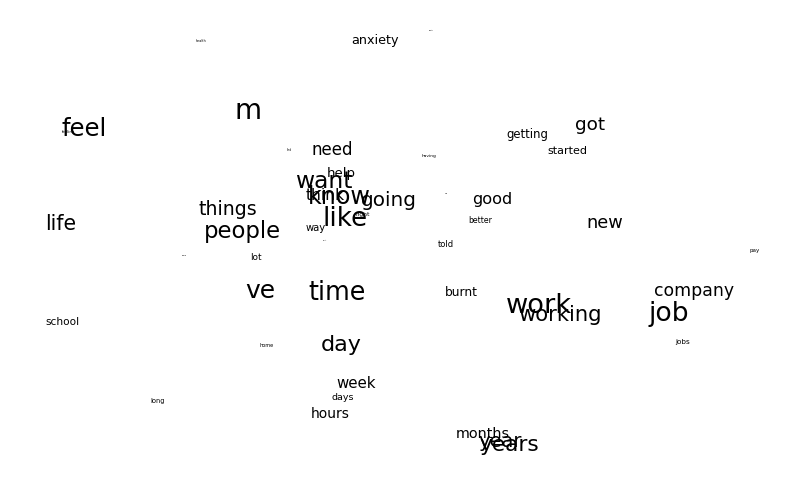

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(BtsneWords[:, 0], BtsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(BtargetWords):
    ax.annotate(word, (BtsneWords[:, 0][i],BtsneWords[:, 1][i]), size =  20 * (BnumWords - i) / BnumWords)
plt.xticks(())
plt.yticks(())
plt.show()

<font color="red">

## My visualization above puts 'job' below to 'company'.'anxiety' is below to life and 'know' abuts 'want'.

<font color="red">

<font color="red">

## in this dataset, burnout is to stress as diagnosis is to performance.

<font color="red">


<font color="red">

### Based on the .most_similar() function's output, terms like 'severe', 'stress', and 'depressive' are frequently found in proximity to 'burnout' within the analyzed Reddit posts. This pattern suggests that conversations around burnout are tinged with seriousness and a negative sentiment. The discussions likely reflect the gravity with which individuals experience and communicate their feelings of burnout, indicating its profound impact on personal well-being.

### Words linked to 'emotion' such as 'detachment', 'anxiousness', and 'disappointment' also emerge. Their association with 'emotion' in the context of burnout discussions may reveal a tendency among individuals to express negative emotional states that are closely tied to mental health and personal welfare.

<font color="red">

<font color="red">

### This suggests that when discussing burnout, Reddit users are more likely to mention the negative experience of burnout than to describe it as an interesting or engaging subject.

### Combining 'burnout' and 'emotion', while excluding 'interesting':
- The list of words includes terms like 'pain', 'fatigue', and 'headaches', highlighting an association between burnout and negative physical sensations.
- Terms such as 'ideation', 'exhaustion', and 'depressive' emphasize the psychological and emotional impact of burnout, suggesting feelings of mental weariness and depression.

### Combining 'burnout' and 'performance', while excluding 'stress':
- Words like 'reviews', 'management', and 'executive' relate to job performance assessments and managerial responsibilities, implying that burnout is discussed as an impediment to work performance and career progression.
- 'Harassment', 'diagnosis', and 'bipolar' might point to workplace issues or health conditions associated with burnout, like workplace harassment or mental health diagnoses.
- The appearance of 'dysfunction' and 'leadership' could reflect discussions on the relationship between leadership roles and organizational dysfunction.

<font color="red">

<font color="red">

 ### TSNE visualization of word vectors,words like 'work', 'working', 'job', and 'company' are grouped, which aligns with a common theme of work-related burnout. Other clusters seem to show different aspects of life affected by burnout, like 'time', 'day', 'week', suggesting a temporal concern, and 'feel', 'life', 'things', indicating a more personal and emotional impact.

 <font color="red">

# For fasttext

In [ ]:
! pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199774 sha256=7ec263a400bb755ccf2064535aca65a0f3f5bbfc0ab5f58d888c5420aa768837
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
output_file_path = 'selftext_content.txt'
with open(output_file_path, 'w', encoding='utf-8') as file:
    for entry in BurnoutDF['selftext']:
        file.write(entry + '\n')

In [ ]:
file_address = "/content/selftext_content.txt"

In [ ]:
model = fasttext.train_unsupervised(file_address, minCount=200, epoch=1)

In [ ]:
model.words

['I',
 'to',
 '</s>',
 'and',
 'the',
 'a',
 'my',
 'of',
 'in',
 'for',
 'that',
 'have',
 'is',
 'was',
 'with',
 'but',
 'me',
 'it',
 'this',
 'on',
 'just',
 "I'm",
 'at',
 'be',
 'not',
 'so',
 'out',
 'like',
 'work',
 'as',
 'or',
 'do',
 'get',
 'about',
 'been',
 'job',
 'you',
 'because',
 'feel',
 'had',
 'from',
 'all',
 'am',
 'are',
 'they',
 'time',
 'if',
 'up',
 'what',
 'an',
 'would',
 'I’m',
 'know',
 'i',
 'want',
 "don't",
 'more',
 'can',
 'when',
 'even',
 'really',
 'no',
 "I've",
 'how',
 'has',
 'some',
 'we',
 'people',
 'one',
 'being',
 'The',
 'working',
 'will',
 'My',
 'going',
 'she',
 'only',
 'any',
 'go',
 'also',
 'by',
 'much',
 'got',
 'he',
 'myself',
 'other',
 'who',
 'very',
 'her',
 'into',
 'back',
 'them',
 'now',
 'day',
 'years',
 'make',
 'there',
 'new',
 'need',
 'after',
 'doing',
 'things',
 'than',
 'which',
 'think',
 'could',
 'still',
 'were',
 "it's",
 'their',
 'burnt',
 'over',
 'where',
 'your',
 'take',
 'But',
 'good',
 '

In [ ]:
model.get_word_vector("the")

array([-0.01457158, -0.05415202,  0.20256299, -0.34579107,  0.34044328,
        0.26740402, -0.22603092, -0.01779335,  0.00628277,  0.10315798,
       -0.06383735, -0.09543122, -0.24061951,  0.0742328 , -0.00270907,
        0.2505611 , -0.06505657,  0.03906732,  0.20302978,  0.03734189,
        0.14434724,  0.02585781,  0.05384015, -0.10630972, -0.27082008,
       -0.11237118,  0.04503753,  0.28086567, -0.04489471, -0.21123035,
        0.00481409, -0.18676427, -0.19183318, -0.1526488 , -0.06065096,
       -0.0706436 ,  0.0610218 , -0.04419847,  0.00546843,  0.03134282,
       -0.03976306, -0.12459142,  0.19847728,  0.25453043, -0.01162918,
       -0.11219855,  0.1011603 , -0.01542659, -0.09300067, -0.11280736,
       -0.16355138, -0.02434631, -0.09937742,  0.19166332,  0.1643567 ,
       -0.18298201,  0.12286066,  0.02807594, -0.1320079 ,  0.15954572,
       -0.11365268, -0.17648922, -0.04414129,  0.12446257,  0.16564222,
        0.11194059, -0.3303682 , -0.31362268,  0.12399892, -0.09

In [ ]:
model.save_model("Bself.bin")

In [ ]:
model = fasttext.load_model("Bself.bin")

In [ ]:
[model.get_word_vector(x) for x in ["burnout", "performance", "stress"]]

[array([ 0.13863686, -0.08617689,  0.22419067, -0.3677595 ,  0.13260184,
         0.02650493,  0.08264831,  0.09629375, -0.04857713,  0.18396659,
        -0.00097783,  0.01249562, -0.11419412, -0.44963327, -0.23282723,
         0.40874836, -0.16734536, -0.01467535, -0.07599905,  0.12661886,
         0.17636617, -0.0543875 ,  0.15579261,  0.1560088 , -0.14820187,
         0.15972188, -0.02689895,  0.04819859, -0.03635102, -0.333813  ,
        -0.41985184, -0.34036636, -0.25588524, -0.07873265, -0.03342772,
         0.08614206, -0.0260954 , -0.04480628,  0.14478451, -0.06909702,
        -0.06240931,  0.25599125,  0.18560933,  0.1138775 , -0.08198162,
        -0.20191045,  0.21238942, -0.3627283 , -0.24430251,  0.09377148,
         0.01023655, -0.19682951, -0.05057606,  0.10143846,  0.10531767,
         0.12425379,  0.15784264,  0.2511395 , -0.09849384,  0.11806528,
         0.17606226, -0.0227998 ,  0.02904829,  0.34069645,  0.23925191,
         0.23578936, -0.00482903, -0.00822331,  0.0

In [ ]:
model.get_word_vector("hght")

array([ 0.18569683,  0.07253281,  0.09665425, -0.08645362,  0.06311315,
        0.04507584, -0.11264171,  0.06502113,  0.07322102,  0.00139229,
       -0.05596232,  0.04320321, -0.04188237,  0.09546822, -0.07941092,
        0.02031944,  0.01439247,  0.00698802, -0.09304919, -0.1988697 ,
        0.07891092,  0.06722361,  0.05456904,  0.06340321, -0.00630167,
        0.00342577, -0.04433278,  0.10424556, -0.1129355 ,  0.04513645,
       -0.16228834, -0.06310915, -0.08659124, -0.12707122, -0.08619693,
        0.11317424,  0.09077319, -0.14892112,  0.05002548, -0.0454532 ,
        0.13784286, -0.00446689,  0.04540137, -0.01182245,  0.08436753,
       -0.01014288,  0.0401276 , -0.04436369,  0.03051593, -0.02947254,
       -0.05857419, -0.03376098, -0.12431473, -0.06270029,  0.01905449,
       -0.02586775,  0.09307363,  0.03626556, -0.02534658, -0.02594648,
       -0.08836999,  0.10891061,  0.01329283,  0.10687194, -0.04791131,
        0.01656367, -0.01822416, -0.09980948,  0.11821812,  0.05

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
word_vectors = [model.get_word_vector(word) for word in model.get_words()[:50]]

In [ ]:
words = model.get_words()[:50]

In [ ]:
word_vectors_array = np.array(word_vectors)

In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors_array)

In [ ]:
reduced_vectors

array([[-0.14254332,  0.1653653 ],
       [ 0.10070188, -0.07429357],
       [ 0.10706506,  0.47054797],
       [-0.26192358, -0.06758255],
       [ 0.18520933, -0.514618  ],
       [-0.40277296, -0.35901847],
       [-0.35579896, -0.18205456],
       [-0.30018023, -0.13226548],
       [-0.22511275, -0.4785055 ],
       [-0.35997888, -0.30455494],
       [ 0.24427702, -0.4131796 ],
       [ 0.0301251 ,  0.00285181],
       [ 0.31336817,  0.02750371],
       [-0.45640996, -0.29908347],
       [-0.448021  , -0.18420552],
       [ 0.17500241,  0.09390672],
       [ 0.2016165 , -0.36665362],
       [ 0.20219958, -0.37914363],
       [ 0.19759828, -0.01206999],
       [-0.1299933 , -0.38721082],
       [ 0.17293909,  0.33081904],
       [-0.1080441 ,  1.2218767 ],
       [-0.40164024, -0.05220031],
       [ 0.51411575, -0.03692923],
       [ 0.42031124,  0.08387879],
       [-0.17124037,  0.0720026 ],
       [-0.19667765, -0.0199771 ],
       [ 0.08576   ,  0.2709733 ],
       [-0.02040417,

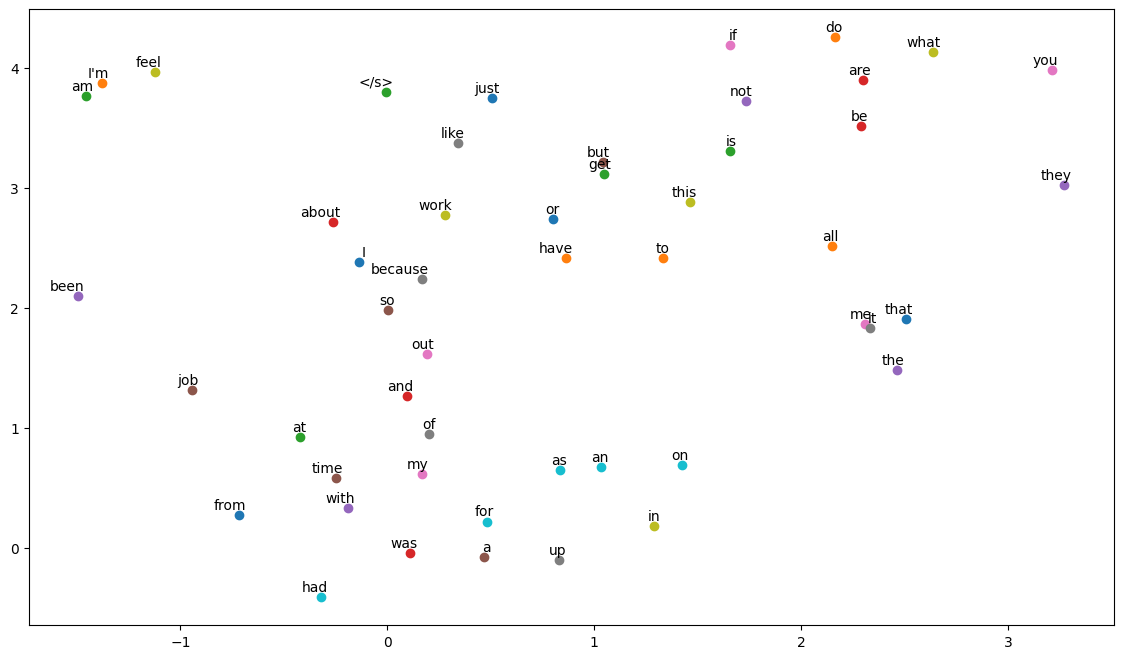

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_vectors = tsne.fit_transform(reduced_vectors)

# Plotting the words in 2D space
plt.figure(figsize=(14, 8))
for i, word in enumerate(words):
    plt.scatter(tsne_vectors[i, 0], tsne_vectors[i, 1])
    plt.annotate(word, xy=(tsne_vectors[i, 0], tsne_vectors[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
numWords = 50
targetWords = model.get_words()[:numWords]



In [ ]:
wordsSubMatrix = [model.get_word_vector(word) for word in targetWords]
wordsSubMatrix = np.array(wordsSubMatrix)

In [ ]:
# Apply PCA to the word vectors
pca = PCA(n_components=50)
reducedPCA_data = pca.fit_transform(wordsSubMatrix)

In [ ]:
# Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=2, random_state=0)
tsneWords = tsne.fit_transform(reducedPCA_data)

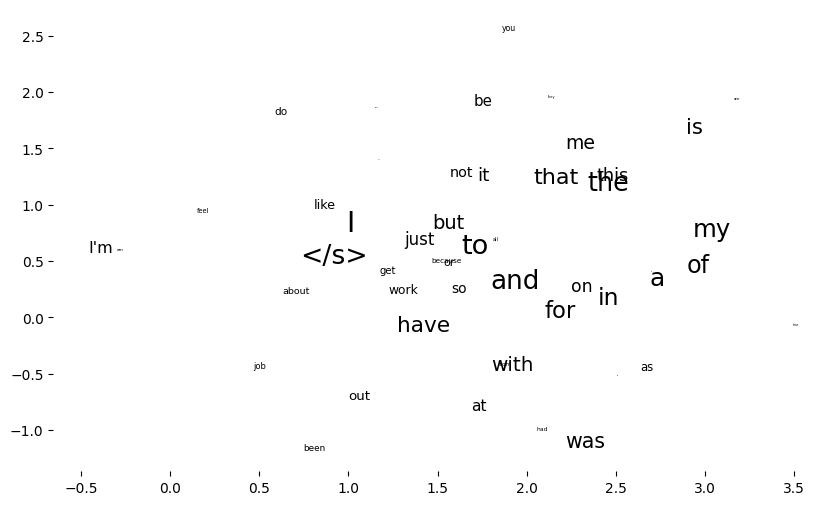

In [ ]:
# Plot the t-SNE reduced word vectors
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)

# Scatter plot with invisible points
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha=0)

# Annotate the points with words
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size=20 * (numWords - i) / numWords)

# Show the plot
plt.show()

 <font color="red">

### For fasttext result seem like not good than word2vec.Most of word is stop words, may need nore cleaning processing.
So the word2vec workflow more effective based this result.

 <font color="red">

 <font color="red">

### But we sitll see some result:

- The '</s>' token is an end-of-sentence marker, and its proximity to the word 'I' does suggest that first-person narrative is prevalent in your corpus. This could indicate that individuals are sharing personal experiences or feelings related to burnout, which is consistent with the introspective and subjective nature of discussing personal emotional states and experiences of burnout on social media.

- The frequent use of first-person pronouns and sentences could also reflect that the corpus contains a significant amount of personal testimony or self-reflection. This is particularly relevant for topics like burnout, where individual experiences and personal impact are often at the forefront of the discussion.

- Despite the abundance of stop words, the presence of words such as 'work' and 'job' amidst the most frequent terms indicates that employment and professional life are central themes in the discussions of burnout. This aligns with the common understanding that job-related stress is a significant contributor to feelings of burnout.

 <font color="red">


# Doc2Vec

Instead of just looking at just how words embed within in the space, we can look at how the different documents relate to each other within the space. First lets load our data--abstracts of most U.S. physics papers from the 1950s.

In [ ]:
apsDF = pd.read_csv('APSabstracts1950s.csv', index_col = 0)

apsDF[:10]

copyrightYear                        doi  \
0           1950  10.1103/RevModPhys.22.221   
1           1951  10.1103/RevModPhys.23.147   
2           1951  10.1103/RevModPhys.23.185   
3           1951  10.1103/RevModPhys.23.203   
4           1951   10.1103/RevModPhys.23.21   
5           1951  10.1103/RevModPhys.23.311   
6           1951  10.1103/RevModPhys.23.315   
7           1951  10.1103/RevModPhys.23.322   
8           1951  10.1103/RevModPhys.23.328   
9           1952  10.1103/RevModPhys.24.108   

                                            abstract  
0  A summarizing account is given of the research...  
1  New tables of coulomb functions are presented ...  
2  Ionization by electron impact in diatomic gase...  
3  It is shown that the conductivity in the ohmic...  
4  The factorization method is an operational pro...  
5  A brief account is given of Dyson's proof of t...  
6  A systematics is given of all transitions for ...  
7  A systematics of the -transitions of even A nu...  
8  The available experiments on the absorption sp...  
9  The classical theory of the dynamics of viscou...

We will load these as documents into Word2Vec, but first we need to normalize and pick some tags.

In [ ]:
keywords = ['photomagnetoelectric', 'quantum', 'boltzmann', 'proton', 'positron', 'feynman', 'classical', 'relativity']

In [ ]:
apsDF['tokenized_words'] = apsDF['abstract'].apply(lambda x: lucem_illud.word_tokenize(x))
apsDF['normalized_words'] = apsDF['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in apsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['copyrightYear'])
    docKeywords.append(row['doi']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['normalized_words'], tags = docKeywords))
apsDF['TaggedAbstracts'] = taggedDocs

Now we can train a Doc2Vec model:

In [ ]:
apsD2V = gensim.models.doc2vec.Doc2Vec(apsDF['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

We can get vectors for the tags/documents, just as we did with words. Documents are actually the centroids (high dimensional average points) of their words.

In [ ]:
apsD2V.docvecs[1952]

array([ 0.47522372,  2.7017558 , -1.344297  ,  0.8588409 ,  0.30929446,
        0.9369865 , -0.42918837,  0.8503308 ,  0.8426844 , -0.82594496,
       -1.3439003 , -0.8417414 ,  0.20433284,  0.3343339 , -1.041668  ,
        0.51828086,  0.783438  ,  0.34935856,  0.57664096, -1.2641361 ,
        1.417075  ,  1.1732146 ,  0.41235414,  0.60235476, -1.8620524 ,
       -1.0522707 ,  0.4833592 , -0.11427418,  1.2301896 ,  1.4572117 ,
        1.2282588 , -0.70153624, -0.60012794,  1.6838121 , -1.1609182 ,
       -0.9389013 ,  0.9239716 , -0.5347603 , -0.43911725, -1.5722787 ,
        1.220825  , -1.6594146 , -1.870447  ,  0.40033305, -1.4195203 ,
        0.23733932, -1.9962168 , -1.0567358 , -1.8464332 ,  0.25339696,
       -1.2563062 ,  0.16872217,  0.47076824, -0.7204701 , -1.1723483 ,
       -1.6465772 ,  0.36797783,  0.41357887, -0.43356863, -1.2651285 ,
       -1.9435492 , -0.6790247 ,  1.5800354 ,  0.01781375, -1.8005286 ,
       -1.2985262 ,  0.9369389 , -0.28359613, -1.6966444 ,  1.30

The words can still be accessed in the same way:

In [ ]:
apsD2V['atom']

array([-1.6770238 , -1.0343108 ,  1.1005778 , -0.72600436,  1.1645813 ,
        0.65432066, -0.7597538 ,  0.82909083,  0.27153605,  0.5550711 ,
       -1.0262775 ,  0.01343375, -0.5982833 ,  0.28509015, -0.59329337,
        1.788566  , -0.3962542 ,  1.828652  ,  0.05623163, -1.984871  ,
       -1.8725805 ,  0.7720149 ,  0.10727599,  0.86136556, -0.18140982,
        0.38271636,  0.48278466,  0.31959787, -0.34194148,  1.3321534 ,
        0.894159  , -0.1075349 , -0.33896026,  1.1735675 , -1.048575  ,
       -0.769703  ,  0.29155728, -0.02292411,  0.29274654, -0.52379143,
        1.037279  ,  0.6525378 , -1.0652894 , -1.4574833 ,  1.2378116 ,
        0.22183715, -0.44950953,  0.6829188 , -0.6084431 ,  1.6787348 ,
        0.07108591,  0.40591708,  1.7055178 , -0.3898999 ,  0.58716714,
       -0.2967302 ,  0.24227485, -0.540202  ,  1.0444974 ,  0.3937816 ,
       -0.6964682 ,  0.30819264,  0.5535553 , -0.4598547 , -1.5659759 ,
       -0.49058533, -0.56716645, -0.80803823,  0.05902727, -0.32

We can still use the ``most_similar`` command to perform simple semantic equations:

In [ ]:
apsD2V.wv.most_similar(positive = ['atom','electrons'], negative = ['electron'], topn = 1)

[('atoms', 0.778275728225708)]

This is interesting. **Electron** is to **electrons** as **atom** is to **atoms**. Another way to understand this, developed below is: **electrons - electron** induces a singular to plural dimension, so when we subtract **electron** from **atom** and add **electrons**, we get **atoms**!

In [ ]:
apsD2V.wv.most_similar(positive = ['einstein','law'], negative = ['equation'], topn = 1)

[('obey', 0.7019518613815308)]

In other words **Einstein** minus **equation** plus **law** equals **Meissner**--Walthur Meissner studied mechanical engineering and physics ... and was more likely to produce a "law" than a "equation", like the Meissner effect, the damping of the magnetic field in superconductors. If we built our word-embedding with a bigger corpus like the entire arXiv, a massive repository of physics preprints, we would see many more such relationships like **gravity - Newton + Einstein = relativity**.

We can also compute all of these *by hand*--explicitly wth vector algebra:

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(apsD2V['electron'].reshape(1,-1), apsD2V['positron'].reshape(1,-1))
#We reorient the vectors with .reshape(1, -1) so that they can be computed without a warning in sklearn

array([[0.4105687]], dtype=float32)

In the doc2vec model, the documents have vectors just as the words do, so that we can compare documents with each other and also with words (similar to how a search engine locates a webpage with a query). First, we will calculate the distance between a word and documents in the dataset:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron'] ], topn=5 )

[('10.1103/PhysRev.113.1545', 0.445621132850647),
 ('10.1103/PhysRev.98.1020', 0.41921064257621765),
 ('10.1103/PhysRev.106.874', 0.41900435090065),
 ('10.1103/PhysRev.89.930', 0.4113309383392334),
 ('10.1103/PhysRev.115.678', 0.41070356965065)]

If we search for the first of these on the web (these are doi codes), we find the following...a pretty good match:

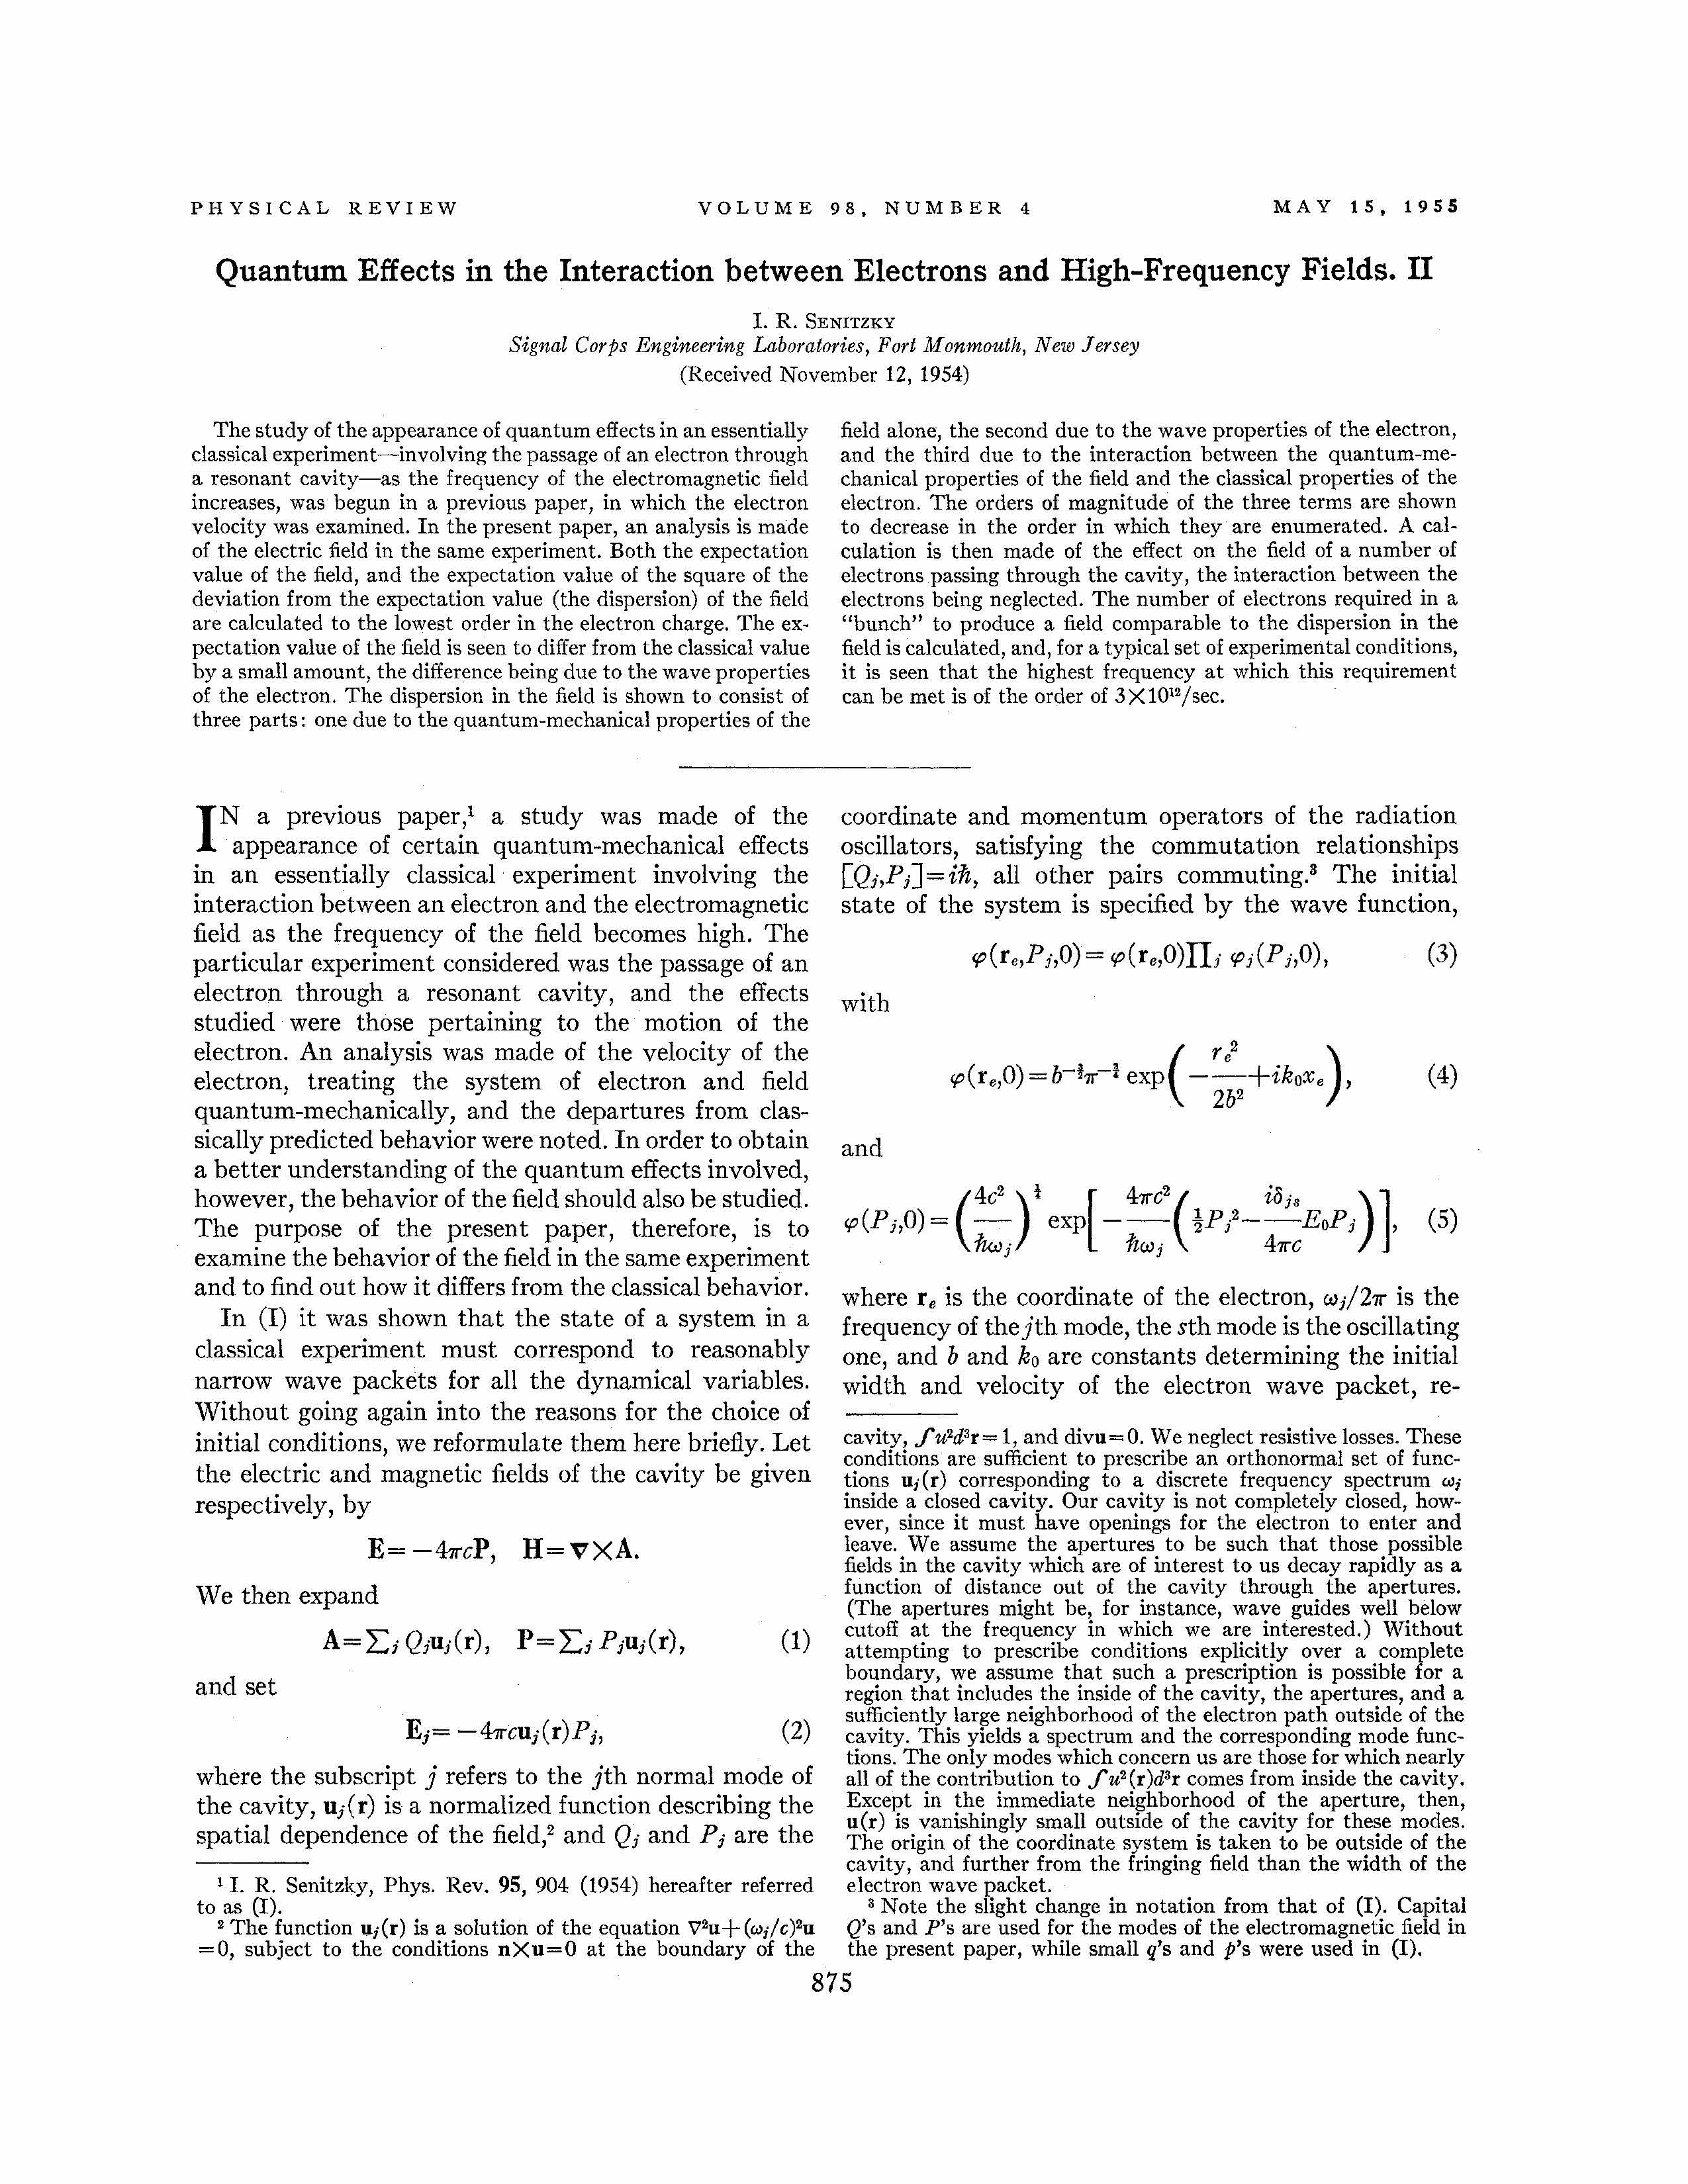

In [ ]:
from IPython.display import Image
Image("PhysRev.98.875.jpg", width=1000, height=1000)

Now let's go the other way around and find words most similar to this document:

In [ ]:
apsD2V.wv.most_similar( [ apsD2V.docvecs['10.1103/PhysRev.98.875'] ], topn=5)

[('volts', 0.6175204515457153),
 ('modulated', 0.5740225315093994),
 ('gauss', 0.5660907030105591),
 ('microscope', 0.5628368258476257),
 ('compensated', 0.5618155002593994)]

We can even look for documents most like a query composed of multiple words:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron']+apsD2V['positron']+apsD2V['neutron']], topn=5 )

[('10.1103/PhysRev.86.493', 0.5010477900505066),
 ('10.1103/PhysRev.99.786', 0.49710613489151),
 ('10.1103/PhysRev.103.340', 0.4926145374774933),
 ('10.1103/PhysRev.108.809', 0.4864920377731323),
 ('10.1103/PhysRev.91.883', 0.4846695065498352)]

Now let's plot some words and documents against one another with a heatmap:

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

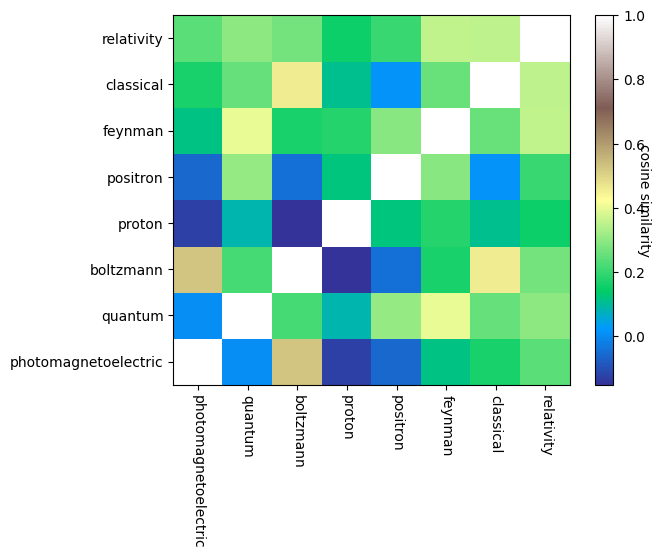

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

Now let's look at a heatmap of similarities between the first ten documents in the corpus:

In [ ]:
targetDocs = apsDF['doi'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

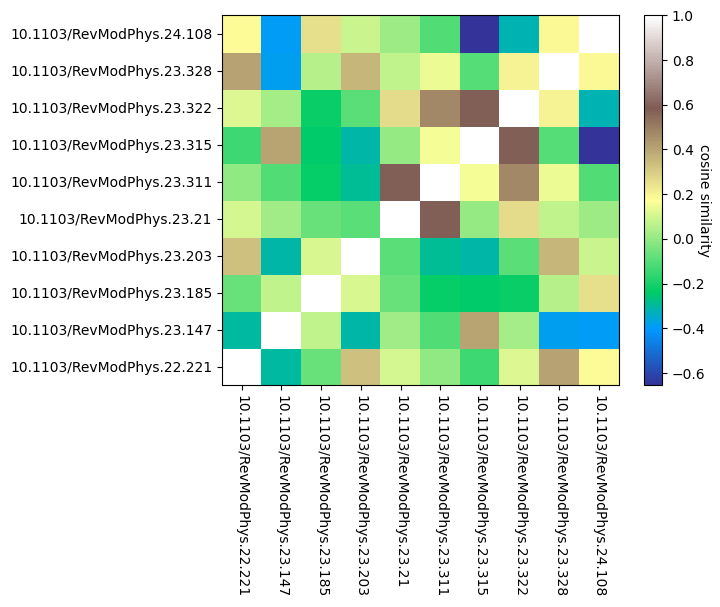

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Now let's look at a heatmap of similarities between the first ten documents and our keywords:

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

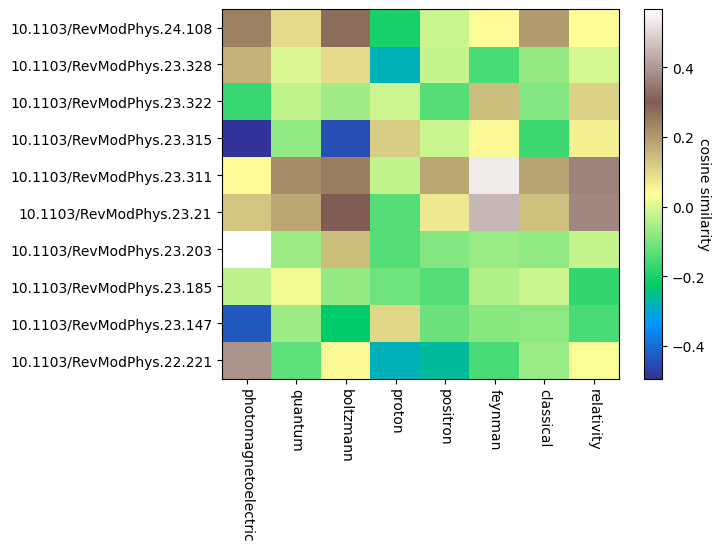

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

We will save the model in case we would like to use it again.

In [ ]:
apsD2V.save('apsW2V')

We can later load it:

In [ ]:
#apsD2V = gensim.models.word2vec.Word2Vec.load('data/apsW2V')

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

In [ ]:
path = '/content/gdrive/MyDrive/macss60000/week4/selected_articles_geodesign.xlsx'  # Make sure this is the correct path

In [ ]:
apsDF = pd.read_excel(path, index_col=0)  # Assuming the file is an Excel file, use read_excel instead of read_csv
apsDF.head(10)

Publication Type                                            Authors  \
ID                                                                       
1                 J   Yang, L; Iwami, M; Chen, YS; Wu, MB; van Dam, KH   
2                 J  Dong, SH; Wang, YD; Dou, MX; Gu, YY; Zhang, PQ...   
3                 J                   Wu, WS; Guo, JH; Ma, ZY; Zhao, K   
4                 J        Liu, SJ; Zhang, L; Long, Y; Long, Y; Xu, MH   
5                 J  Huang, JX; Obracht-Prondzynska, H; Kamrowska-Z...   
6                 J        Gong, LS; Jin, MH; Liu, Q; Gong, YX; Liu, Y   
7                 J                  Peng, ZH; Wang, R; Liu, LB; Wu, H   
8                 S  Burini, F; Ciriello, DE; Ghisalberti, A; Psail...   
9                 J  Ji, HH; Qing, LB; Han, LM; Wang, ZY; Cheng, YQ...   
10                J  Deng, XD; Liu, Y; Gao, F; Liao, SY; Zhou, F; C...   

                                        Article Title  \
ID                                                      
1   Computational decision-support tools for urban...   
2   A Multiobjective Land Use Design Framework wit...   
3   Data-Driven Approach to Assess Street Safety: ...   
4   A New Urban Vitality Analysis and Evaluation F...   
5   The image of the City on social media: A compa...   
6   Identifying Urban Residents' Activity Space at...   
7   Exploring Urban Spatial Features of COVID-19 T...   
8   The Urban Nexus Project: When Urban Mobility A...   
9   A New Data-Enabled Intelligence Framework for ...   
10  Spatial Distribution and Mechanism of Urban Oc...   

                                      Author Keywords  \
ID                                                      
1   Urban design; Urban planning; Decision -suppor...   
2   geo-big data; land use planning; multiobjectiv...   
3   street safety; multisource big data; assessmen...   
4   urban vitality; human activity recognition; mu...   
5   Kevin Lynch; City image; Social media analytic...   
6   activity space; multiple geographic scales; mo...   
7   COVID-19; social media data; sina weibo; spati...   
8                                                 NaN   
9   urban space perception; deep learning; big dat...   
10  urban modeling; residents' occupation mixture;...   

                                        Keywords Plus  \
ID                                                      
1   VIRUS TRANSMISSION; EPIDEMIC; NETWORK; CITIES;...   
2   GENETIC ALGORITHM; PROGRAMMING-MODEL; OPTIMIZA...   
3   BUILT ENVIRONMENT; NEIGHBORHOOD SAFETY; PERCEI...   
4   ACTIVITY PATTERNS; LAND-USE; REGRESSION; BEHAV...   
5                                                 NaN   
6   BUILT ENVIRONMENT; TRAVEL BEHAVIOR; MODE CHOIC...   
7           INFECTIOUS-DISEASE SURVEILLANCE; BIG DATA   
8                                                 NaN   
9   STREET-LEVEL IMAGERY; BUILT ENVIRONMENT; COMPU...   
10  JOBS-HOUSING BALANCE; SOCIAL MEDIA DATA; SELF-...   

                                             Abstract  \
ID                                                      
1   The COVID-19 pandemic highlighted the need for...   
2   Transit-oriented development (TOD) is among th...   
3   Safety is an important quality of street space...   
4   A quantitative study of urban vitality brings ...   
5   The Image of the City by Kevin Lynch is a land...   
6   Residents' activity space reflects multiple as...   
7   During the early stage of the COVID-19 outbrea...   
8   This chapter discusses a multidisciplinary res...   
9   The urban environment has a great impact on th...   
10  Numerous studies have been devoted to uncoveri...   

                                            Addresses  \
ID                                                      
1   [Yang, Liu] Southeast Univ, Sch Architecture, ...   
2   [Dong, Shihai; Wang, Yandong; Dou, Mingxuan; G...   
3   [Wu, Wanshu] Qingdao Univ Technol, Coll Archit...   
4   [Liu, Shaojun; Zhang, Ling; Long, Yi; Long, Ya...   
5   [Huang, Jianxiang; Sun, Yimi

In [ ]:
keywords = ['geodesign', 'urban', 'planning', 'design', 'analysis']

In [ ]:
apsDF['tokenized_words'] = apsDF['Abstract'].apply(lambda x: lucem_illud.word_tokenize(x))
apsDF['normalized_words'] = apsDF['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in apsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['Publication Year'])
    docKeywords.append(row['Article Title']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['normalized_words'], tags = docKeywords))
apsDF['TaggedAbstracts'] = taggedDocs

In [ ]:
apsDF

Publication Type                                            Authors  \
ID                                                                       
1                 J   Yang, L; Iwami, M; Chen, YS; Wu, MB; van Dam, KH   
2                 J  Dong, SH; Wang, YD; Dou, MX; Gu, YY; Zhang, PQ...   
3                 J                   Wu, WS; Guo, JH; Ma, ZY; Zhao, K   
4                 J        Liu, SJ; Zhang, L; Long, Y; Long, Y; Xu, MH   
5                 J  Huang, JX; Obracht-Prondzynska, H; Kamrowska-Z...   
..              ...                                                ...   
57                J                Zhang, SY; Liu, NX; Ma, BN; Yan, SR   
58                J                   Xu, F; Ho, HC; Chi, GQ; Wang, ZQ   
59                J                  Guo, Y; Su, JG; Dong, Y; Wolch, J   
60                J                            Sharmeen, N; Houston, D   
61                J  Wang, HR; Zhang, HP; Zhu, H; Zhao, F; Jiang, S...   

                                        Article Title  \
ID                                                      
1   Computational decision-support tools for urban...   
2   A Multiobjective Land Use Design Framework wit...   
3   Data-Driven Approach to Assess Street Safety: ...   
4   A New Urban Vitality Analysis and Evaluation F...   
5   The image of the City on social media: A compa...   
..                                                ...   
57  The effects of street environment features on ...   
58  Abandoned rural residential land: Using machin...   
59  Application of land use regression techniques ...   
60  Urban Form, Socio-Demographics, Attitude and A...   
61  A multivariate hierarchical regionalization me...   

                                      Author Keywords  \
ID                                                      
1   Urban design; Urban planning; Decision -suppor...   
2   geo-big data; land use planning; multiobjectiv...   
3   street safety; multisource big data; assessmen...   
4   urban vitality; human activity recognition; mu...   
5   Kevin Lynch; City image; Social media analytic...   
..                                                ...   
57  road running; road running intensity; running-...   
58  Rural residential land; Land abandonment; Mach...   
59  Land use regression; Geographic information sy...   
60  variability of activity space; urban form; soc...   
61  Regionalization; spatiotemporal cube; geograph...   

                                        Keywords Plus  \
ID                                                      
1   VIRUS TRANSMISSION; EPIDEMIC; NETWORK; CITIES;...   
2   GENETIC ALGORITHM; PROGRAMMING-MODEL; OPTIMIZA...   
3   BUILT ENVIRONMENT; NEIGHBORHOOD SAFETY; PERCEI...   
4   ACTIVITY PATTERNS; LAND-USE; REGRESSION; BEHAV...   
5                                                 NaN   
..                                                ...   
57  PHYSICAL-ACTIVITY; BUILT ENVIRONMENT; ATTRIBUT...   
58  AGRICULTURAL LAND; DRIVING FORCES; OUT-MIGRATI...   
59  LONG-TERM EXPOSURE; ROADSIDE VEGETATION BARRIE...   
60  PHYSICAL-ACTIVITY; BUILT ENVIRONMENT; TIME; GE...   
61                            AIR-POLLUTION; EXPOSURE   

                                             Abstract  \
ID                                                      
1   The COVID-19 pandemic highlighted the need for...   
2   Transit-oriented development (TOD) is among th...   
3   Safety is an important quality of street space...   
4   A quantitative study of urban vitality brings ...   
5   The Image of the City by Kevin Lynch is a land...   
..                                                ...   
57  Urban streets provide environment for road run...   
58  Rural residential land has been increasingly a...   
59  The land cover types in a 4 km by 4 km space c...   
60  Very few studies have addressed the gap in lit...   
61  In GIScience, the regionalization method is wi...   

                                            Addresses  \
ID             

In [ ]:
print(apsDF['TaggedAbstracts'])


ID
1     ([covid-19, pandemic, highlighted, need, decis...
2     ([transit, oriented, development, tod, feasibl...
3     ([safety, important, quality, street, space, a...
4     ([quantitative, study, urban, vitality, brings...
5     ([image, city, kevin, lynch, landmark, plannin...
                            ...                        
57    ([urban, streets, provide, environment, road, ...
58    ([rural, residential, land, increasingly, aban...
59    ([land, cover, types, km, km, space, centered,...
60    ([studies, addressed, gap, literature, examini...
61    ([giscience, regionalization, method, widely, ...
Name: TaggedAbstracts, Length: 61, dtype: object


In [ ]:
apsD2V = gensim.models.doc2vec.Doc2Vec(apsDF['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

In [ ]:
apsD2V.docvecs[1952]

array([ 3.1008481e-04, -6.4988718e-03, -3.9663147e-03, -7.1714651e-03,
        2.2673381e-03,  4.0157964e-03, -8.1563517e-03, -9.1564488e-03,
        7.5323237e-03, -9.8021161e-03, -9.4050225e-03,  3.3161521e-03,
        1.4392185e-03,  8.4825549e-03,  2.3638464e-03, -8.0938898e-03,
        3.1151795e-03, -2.4342311e-03, -6.6866805e-03,  7.7352347e-03,
        9.9296244e-03,  8.9767687e-03,  2.6071381e-03,  1.5237666e-03,
       -1.4990497e-03, -9.4778128e-03, -8.8629900e-03, -5.5156825e-03,
        1.1971438e-03, -7.1966518e-03, -5.8519375e-03, -7.4163959e-03,
       -2.0046139e-03,  2.2849846e-03, -4.4020987e-03,  2.4171949e-03,
       -7.1613370e-03,  8.2830181e-03, -2.0809304e-03, -3.5944820e-04,
        2.4164916e-05, -8.0545305e-04,  8.6556319e-03, -7.0402599e-03,
       -3.7931441e-04,  5.7177604e-03, -7.5239060e-04,  4.9684523e-03,
       -7.0790444e-03,  1.7044640e-03,  1.7651176e-03, -3.0558575e-03,
       -6.5709446e-03,  5.8614672e-03, -8.4649660e-03,  2.1392703e-03,
      

In [ ]:
apsD2V['design']

array([ 0.09519818, -0.07931441,  0.02332379, -0.03153445,  0.0980649 ,
       -0.05772919, -0.02364427, -0.00886066, -0.09564874,  0.02496948,
        0.06666581,  0.07169713, -0.00216619,  0.014522  ,  0.06337234,
       -0.13522674, -0.03948299,  0.08920012, -0.04414395, -0.13405602,
        0.00261688,  0.03490194, -0.00914881,  0.0900879 , -0.1019901 ,
        0.04814562,  0.08774721, -0.0222741 ,  0.05371163, -0.00647061,
        0.01687653, -0.01313881,  0.12607118, -0.08223661,  0.029623  ,
       -0.05117329, -0.09389971, -0.09179021, -0.12970318, -0.06864553,
        0.06665099, -0.0940832 , -0.02736085, -0.01423522, -0.02260434,
       -0.07806399, -0.00352207,  0.08120299,  0.03089312,  0.03935886,
        0.01340609, -0.01628537, -0.07804325, -0.11094642, -0.10872213,
        0.0541653 ,  0.08366632,  0.03029097, -0.05886506,  0.07618866,
        0.02031291,  0.03570017,  0.01312649,  0.08330031, -0.09711082,
       -0.1028751 ,  0.01170452,  0.16666034,  0.06145211, -0.04

In [ ]:
apsD2V.wv.most_similar(positive = ['design','spatial'], negative = ['space'], topn = 1)

[('results', 0.9948161840438843)]

In [ ]:
apsD2V.wv.most_similar(positive = ['people','green'], negative = ['mobility'], topn = 1)

[('greenery', 0.9944275617599487)]

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(apsD2V['design'].reshape(1,-1), apsD2V['spatial'].reshape(1,-1))
#We reorient the vectors with .reshape(1, -1) so that they can be computed without a warning in sklearn

array([[0.99631506]], dtype=float32)

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['design'] ], topn=5 )

[('design', 0.9967434406280518),
 (2020, 0.9966615438461304),
 ('Spatial context mining approach for transport mode recognition from mobile sensed big data',
  0.9965938925743103),
 ('urban', 0.996586263179779),
 ('analysis', 0.9964970946311951)]

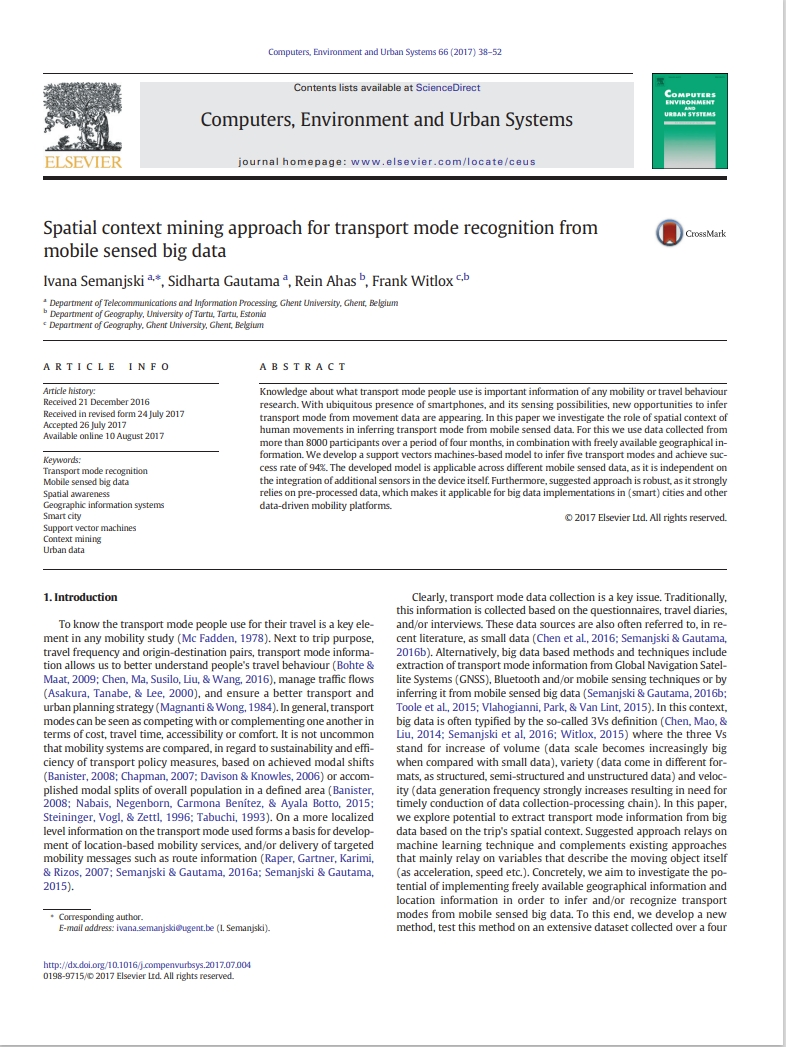

In [ ]:
from IPython.display import Image
Image("/content/gdrive/MyDrive/macss60000/week4/Spatial context mining approach for transport mode recognition from mobile sensed big data.jpg", width=1000, height=1000)

In [ ]:
apsD2V.wv.most_similar( [ apsD2V.docvecs['Spatial context mining approach for transport mode recognition from mobile sensed big data'] ], topn=5)

[('data', 0.9994285702705383),
 ('model', 0.999283492565155),
 ('urban', 0.9992387890815735),
 ('method', 0.9992102980613708),
 ('different', 0.9991925358772278)]

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['spatial']+apsD2V['approach']+apsD2V['mobility']], topn=10 )

[('urban', 0.9997446537017822),
 ('design', 0.9996455907821655),
 ('planning', 0.9995354413986206),
 (2021, 0.9995349645614624),
 (2020, 0.9995100498199463),
 (2022, 0.999455451965332),
 ('analysis', 0.9994183778762817),
 ('Spatial context mining approach for transport mode recognition from mobile sensed big data',
  0.9994041323661804),
 (2017, 0.9994039535522461),
 (2019, 0.9993436336517334)]

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

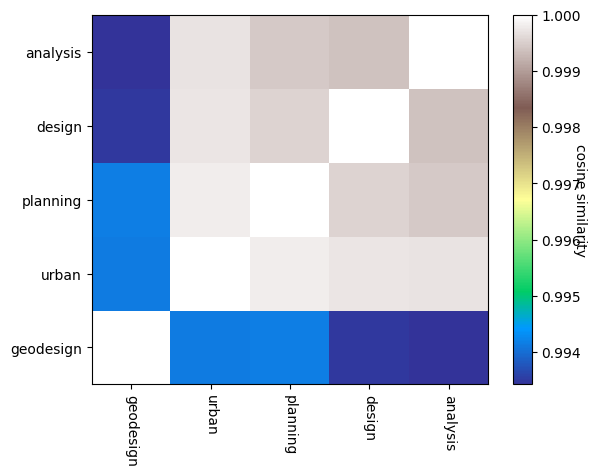

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [ ]:
targetDocs = apsDF['Article Title'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

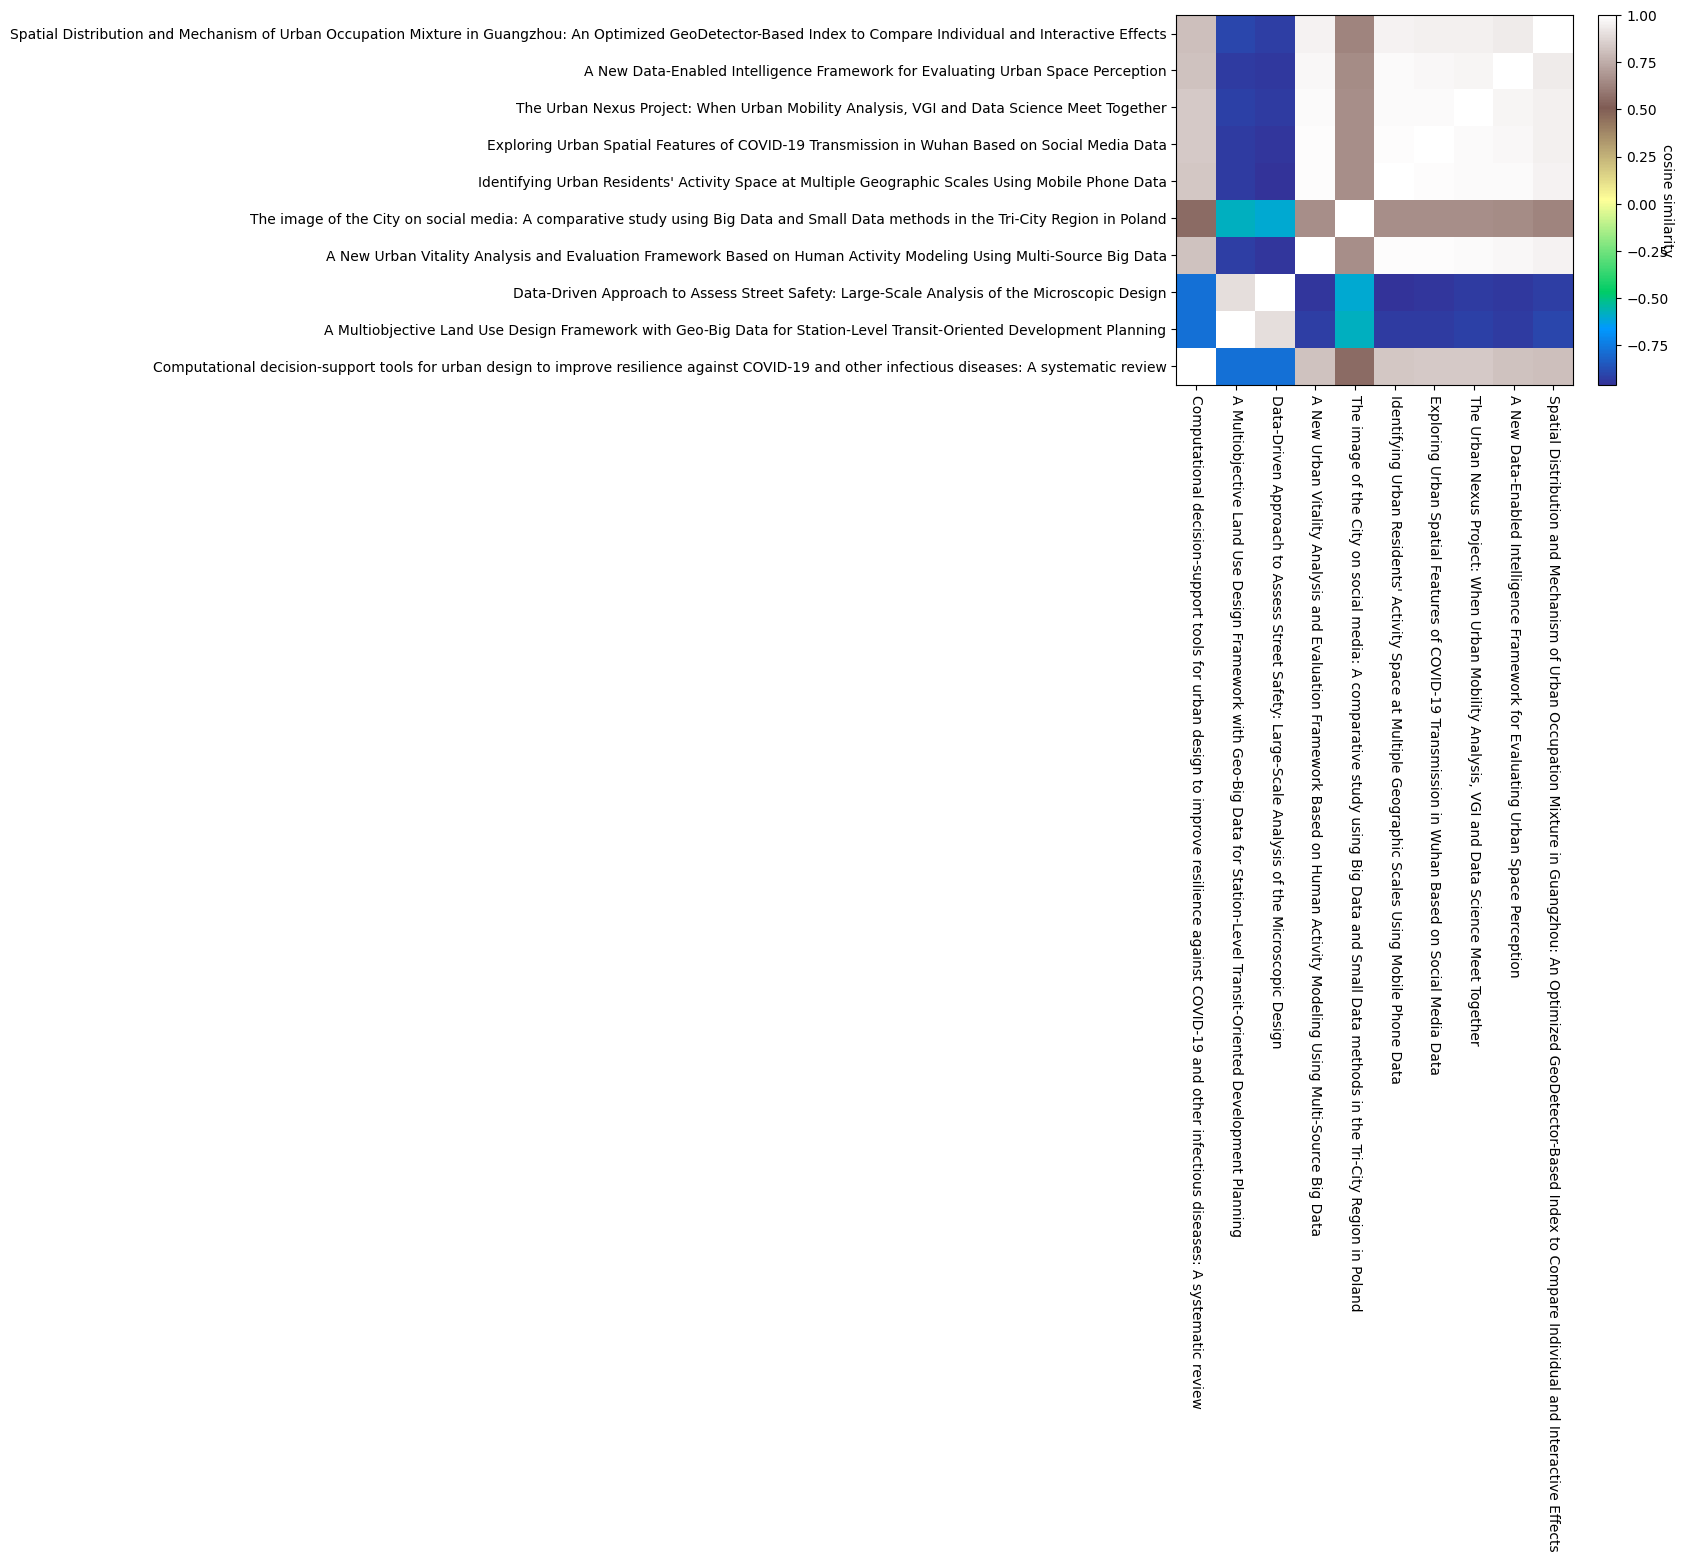

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

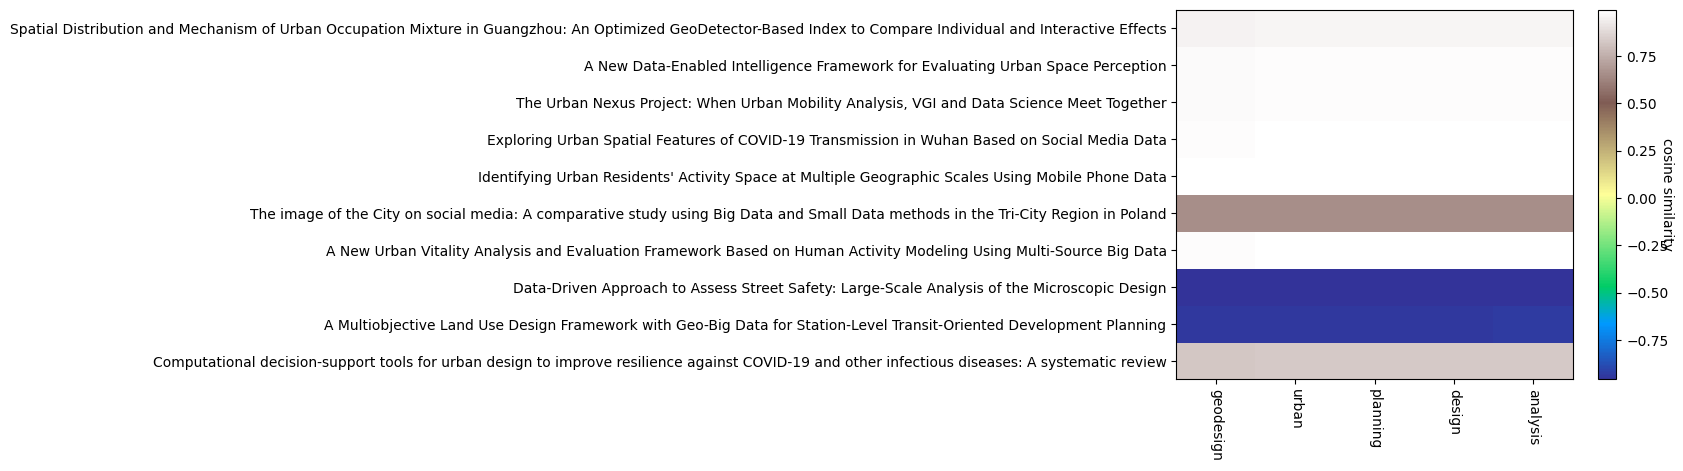

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
apsD2V.save('apsW2V')

In [ ]:
#

<font color="red">

# This corpus includes 61 paper abstracts and data from various fields of geo design related to ai tools 
<font color="red">

<font color="red">

### Cosine Similarity Between 'Design' and 'Spatial': The high cosine similarity score (nearly 1) indicates that in corpus, the contexts in which 'design' and 'spatial' are discussed are very similar, suggesting that these concepts are closely related in geodesign literature.

<font color="red">

<font color="red">

### Most Similar Documents to 'Design'. The documents listed include titles about urban analysis, spatial context mining, and transport mode recognition, among others. This indicates that the concept of 'design' in your corpus is closely associated with these topics, which are likely central themes in the geodesign literature.

- the paper : 'Spatial context mining approach for transport mode recognition from mobile sensed big data' have most closed result 0.9965938925743103.


<font color="red">

<font color="red">

### [('results', 0.9948161840438843)] This suggests that in your corpus, when talking about 'design' in a 'spatial' context but not in the general concept of 'space', the term 'results' is closely related. It could imply that the discussions are around the outcomes or 'results' of spatial design, where 'space' might be more abstract or general, and 'spatial design' is more specific and outcome-oriented.


### [('greenery', 0.9944275617599487)] This suggests in the dataset, 'greenery' is associated with 'people' and 'green' but is not something that moves ('mobility'). This could reflect a focus on static green spaces like parks or gardens within urban design, which are designed for people to enjoy rather than 'mobility', which would relate to the movement of people, such as in transportation.

<font color="red">

<font color="red">

### Document vector for "Spatial context mining approach for transport mode recognition from mobile sensed big data". The top 5 most similar words are 'data', 'model', 'urban', 'method', and 'different'. 

<font color="red">

<font color="red">

### "Design"  shows high similarity with "planning" and "urban," This suggests that in the corpus of documents used to train the model, these terms are often used in similar contexts or are related to one another. On the other hand, "geodesign" has a less strong, but still high, similarity with "urban" and "planning," as indicated by the lighter.

<font color="red">

# Projection

We can also project word vectors to an arbitray semantic dimension. To demonstrate this possibility, let's first load a model trained with New York Times news articles.

In [ ]:
nytimes_model = gensim.models.KeyedVectors.load_word2vec_format('nytimes_cbow.reduced.txt')

First we can visualize with dimension reduction

In [ ]:
#words to create dimensions
tnytTargetWords = ['man','him','he', 'woman', 'her', 'she', 'black','blacks','African', 'white', 'whites', 'Caucasian', 'rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest', 'cheap', 'inexpensive']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse", "steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry", "basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(nytimes_model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNYT = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

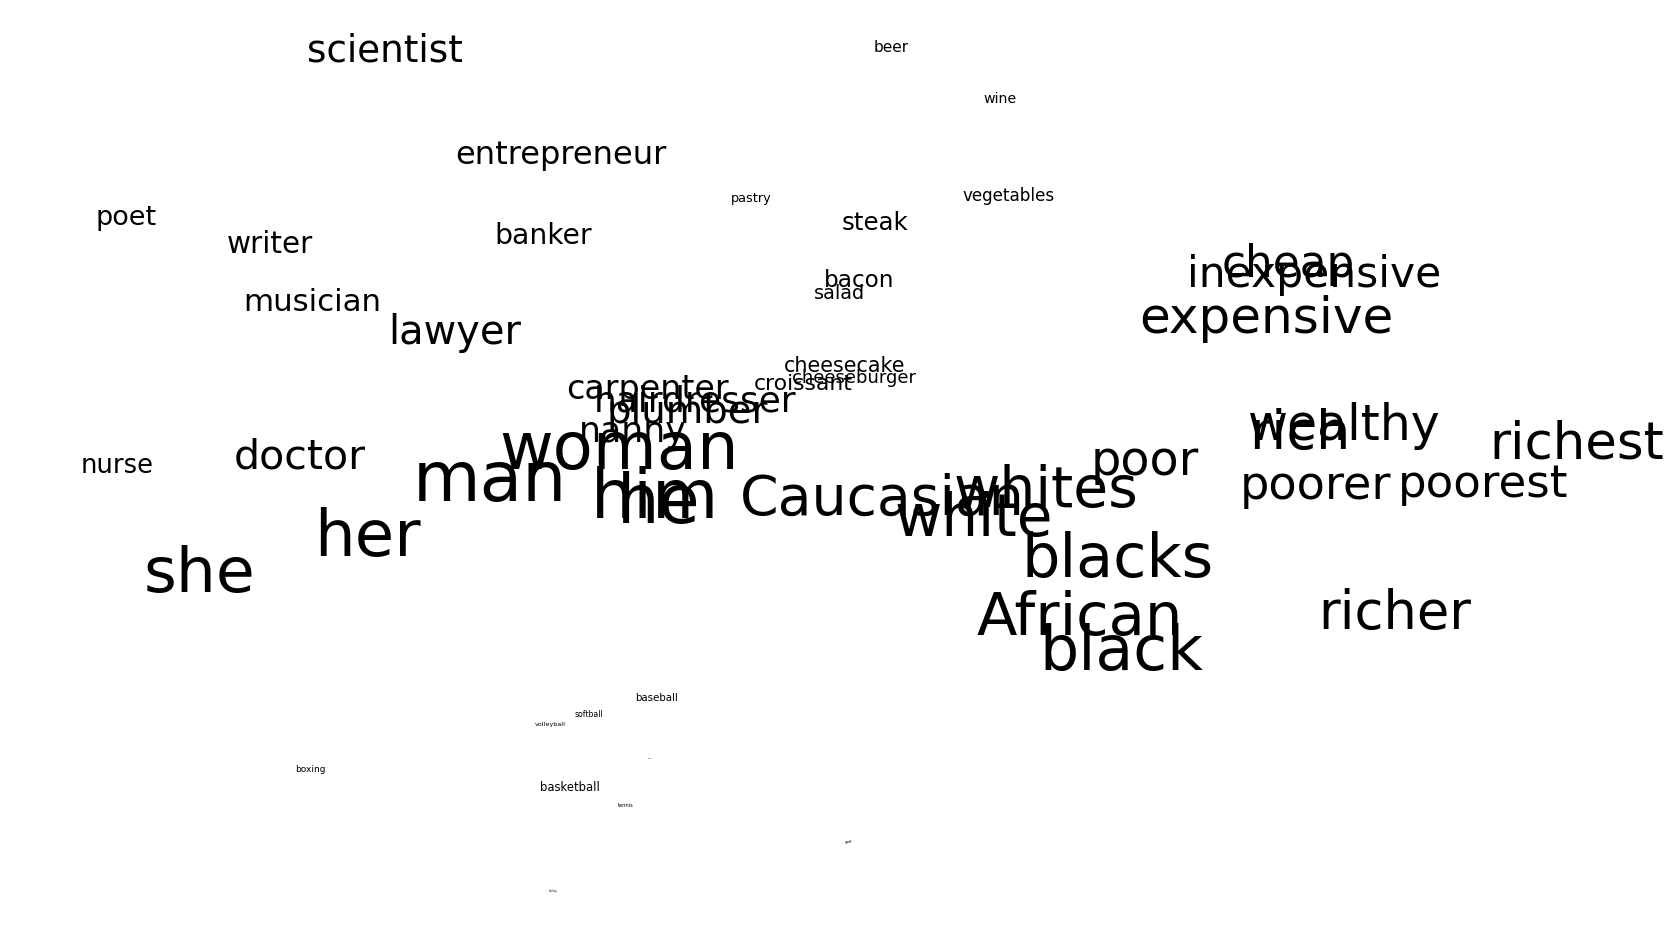

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions.

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [ ]:
Gender = dimension(nytimes_model, ['man','him','he'], ['woman', 'her', 'she'])
Race = dimension(nytimes_model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
Class = dimension(nytimes_model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

Here we have some words.

In [ ]:
Occupations = ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"]

Sports  = ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]

Define a function to project words in a word list to each of the three dimensions.

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pd.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

Get the projections.

In [ ]:
OCCdf = makeDF(nytimes_model, Occupations)
Fooddf = makeDF(nytimes_model, Foods)
Sportsdf = makeDF(nytimes_model, Sports)

Define some useful functions for plotting.

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

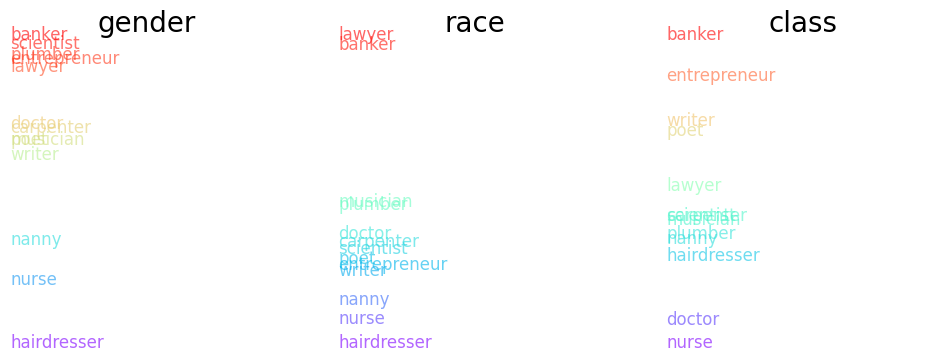

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

Foods:

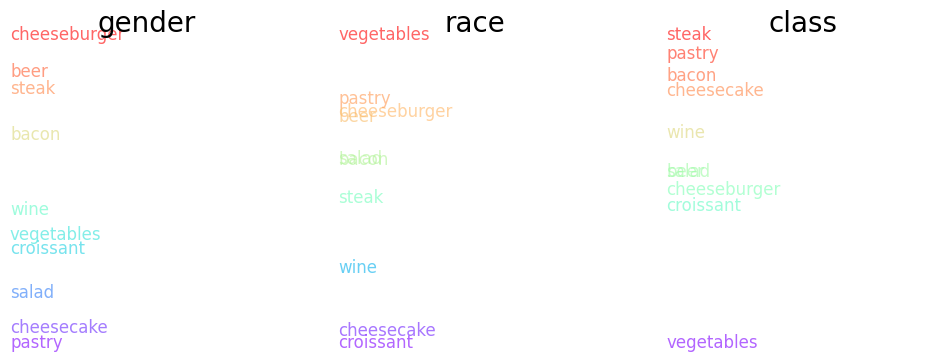

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

Sports:

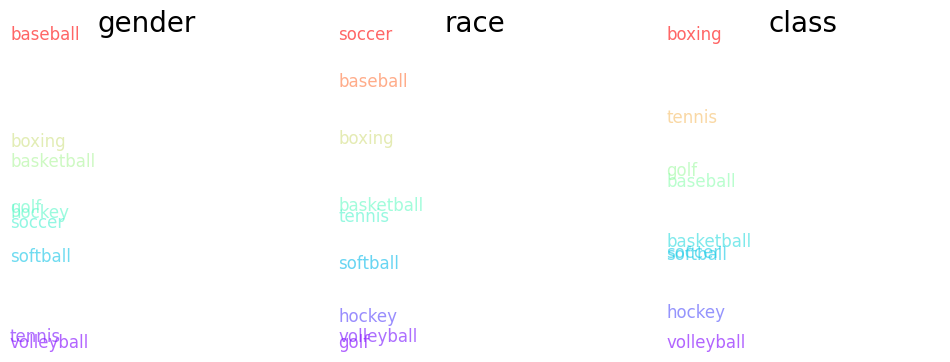

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why?

<font color="red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

In [ ]:
bselftext = "/content/selftext_content.txt"

In [ ]:
from gensim.models import KeyedVectors

burnout_keyed_vectors = KeyedVectors.load("burnoutWORD2Vec")


In [ ]:
with open("burnoutWORD2Vec", "rb") as file:
    contents = file.read()
    print(contents[:100])

b'\x80\x04\x95\x00\x00\x01\x00\x00\x00\x00\x00\x8c\x16gensim.models.word2vec\x94\x8c\x08Word2Vec\x94\x93\x94)\x81\x94}\x94(\x8c\x0bvector_size\x94Kd\x8c\x07workers\x94K\x03\x8c\x06epochs\x94K\x05\x8c\x0btrai'


In [ ]:
#words to create dimensions
tnytTargetWords = ['burnout', 'work', 'performance', 'health', 'mental', 'like', 'people', 'teach','years', 'things', 'burnt', 'company', 'anxiety', 'feeling', 'school', 'jobs', 'health', 'boss', 'poorer', 'pay', 'hard', 'able']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","better", "nanny","carpenter","entrepreneur","musician","writer", "banker","bad","nurse", "steak", "home", "tobacco", "alcohol", "salad", "tattoo", "vegetables", "beer", "wine", "dinner", "basketball", "baseball", "boxing", "ball", "volleyball", "tennis", "golf", "hockey", "soccer"]


In [ ]:
wordsSubMatrix = []
for word in tnytTargetWords:
    try:
        # Retrieve the word vector for the given word from the model's wv (word vectors) attribute
        wordsSubMatrix.append(burnout_keyed_vectors.wv[word])
    except KeyError:
        # If the word is not in the vocabulary, you can choose to skip it or handle the exception as needed
        print(f"Word '{word}' not found in the model.")

wordsSubMatrix = np.array(wordsSubMatrix)

In [ ]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNYT = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

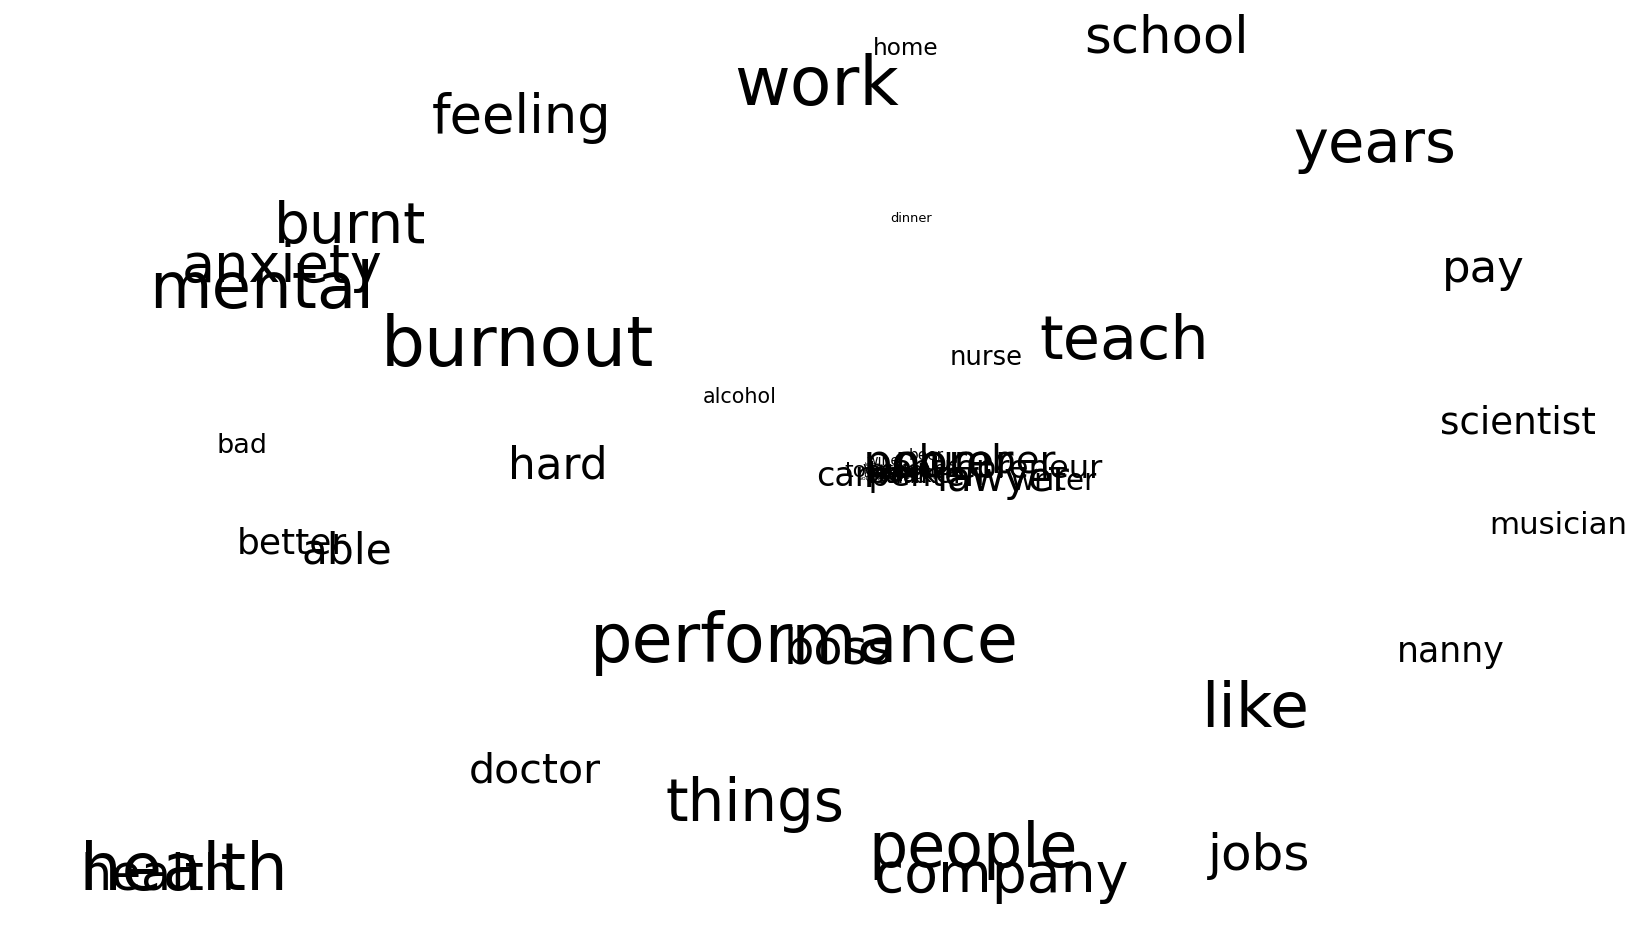

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [ ]:
Feel = dimension(burnout_keyed_vectors.wv, ['burnout','anxiety','hard'], ['burnt', 'mental', 'poorer'])
Work = dimension(burnout_keyed_vectors.wv, ['performance','work','jobs'], ['boss', 'company', 'school'])
Drug = dimension(burnout_keyed_vectors.wv, ['alcohol', 'vodka', 'dinner', 'wine', 'beer'], ['tobacco', 'weed', 'smoking', 'drugs', 'medicine'])

In [ ]:
Occupations = ["doctor","lawyer","plumber","scientist", "nanny","carpenter","entrepreneur","musician","writer", "banker","nurse"]

Foods = ["steak", "alcohol", "dinner", "salad", "burger", "vegetables", "beer", "wine"]

Sports  = ["basketball", "baseball", "boxing", "volleyball", "tennis", "golf", "hockey", "soccer"]

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(burnout_keyed_vectors.wv[word].reshape(1,-1), Feel.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(burnout_keyed_vectors.wv[word].reshape(1,-1), work.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(burnout_keyed_vectors.wv[word].reshape(1,-1), drug.reshape(1,-1))[0][0])
    df = pd.DataFrame({'Feel': g, 'Work': r, 'Drug': c}, index = word_list)
    return df

In [ ]:
OCCdf = makeDF(burnout_keyed_vectors.wv, Occupations)
Fooddf = makeDF(burnout_keyed_vectors.wv, Foods)
Sportsdf = makeDF(burnout_keyed_vectors.wv, Sports)

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

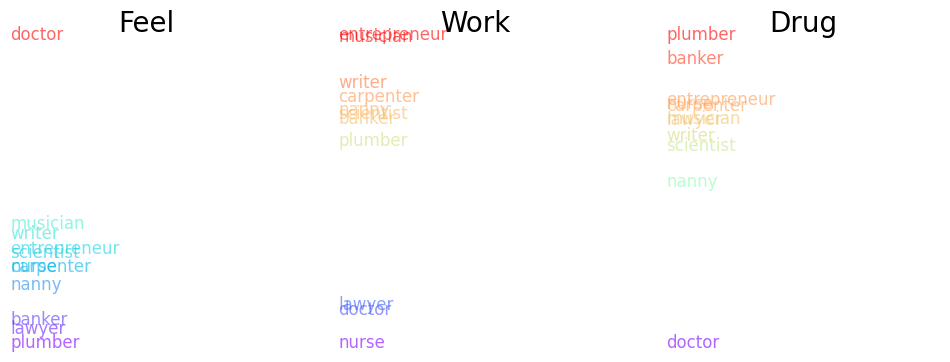

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'Feel')  # Assuming the correct column name is 'Feeling'
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'Work')  # Assuming the correct column name is 'Working'
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'Drug')  # Assuming the correct column name is 'Drugging'
plt.show()

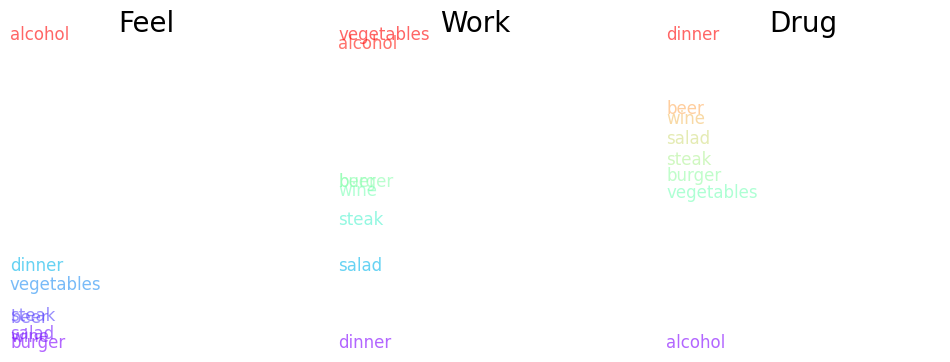

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'Feel')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'Work')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'Drug')
plt.show()

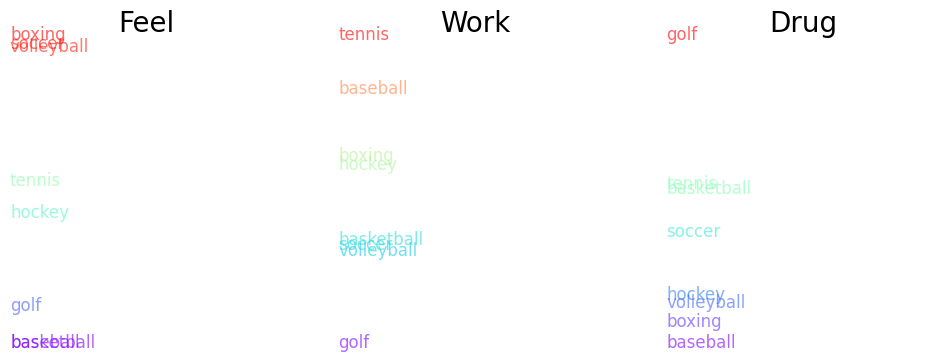

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'Feel')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'Work')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'Drug')
plt.show()

# Linguistic Change or Difference

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic chanage as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec [here](https://arxiv.org/pdf/1605.09096.pdf).

In [ ]:
import copy

In [ ]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    # base_vecs = calc_syn0norm(in_base_embed)
    # other_vecs = calc_syn0norm(in_other_embed)
    base_vecs= [in_base_embed.wv.get_vector(w,norm=True) for w in set(in_base_embed.wv.index_to_key)]
    other_vecs= [in_other_embed.wv.get_vector(w,norm=True) for w in set(in_other_embed.wv.index_to_key)]

    # just a matrix dot product with numpy
    m = np.array(other_vecs).T.dot(np.array(base_vecs))
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v)
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.vectors =(np.array(other_vecs)).dot(ortho)
    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count")  + m2.wv.get_vecattr(w, "count") ,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        new_arr = [m.wv.get_vector(w,norm=True) for w in common_vocab]

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        # old_vocab = m.wv.index_to_key
        new_vocab = []
        k2i={}
        for new_index,word in enumerate(common_vocab):
            new_vocab.append(word)
            k2i[word]=new_index
        m.wv.index_to_key=new_vocab
        m.wv.key_to_index=k2i
        m.wv.vectors=np.array(new_arr)

    return (m1,m2)

In order to explore this, let's get some data that follows a time trend. We'll look at conference proceedings from the American Society for Clinical Oncologists.

In [ ]:
apsDF = pd.read_csv("APSabstracts1950s.csv", index_col=0)

Prepare for wor2vec:

In [ ]:
apsDF['tokenized_sents'] = apsDF['abstract'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
apsDF['normalized_sents'] = apsDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
apsDF.head()

copyrightYear                        doi  \
0           1950  10.1103/RevModPhys.22.221   
1           1951  10.1103/RevModPhys.23.147   
2           1951  10.1103/RevModPhys.23.185   
3           1951  10.1103/RevModPhys.23.203   
4           1951   10.1103/RevModPhys.23.21   

                                            abstract  \
0  A summarizing account is given of the research...   
1  New tables of coulomb functions are presented ...   
2  Ionization by electron impact in diatomic gase...   
3  It is shown that the conductivity in the ohmic...   
4  The factorization method is an operational pro...   

                                     tokenized_sents  \
0  [[A, summarizing, account, is, given, of, the,...   
1  [[New, tables, of, coulomb, functions, are, pr...   
2  [[Ionization, by, electron, impact, in, diatom...   
3  [[It, is, shown, that, the, conductivity, in, ...   
4  [[The, factorization, method, is, an, operatio...   

                                    normalized_sents  
0  [[summarizing, account, given, research, bariu...  
1  [[new, tables, coulomb, functions, presented, ...  
2  [[ionization, electron, impact, diatomic, gase...  
3  [[shown, conductivity, ohmic, cuprous, oxide, ...  
4  [[factorization, method, operational, procedur...

We will be creating many embeddings so we have created this function to do most of the work. It creates two collections of embeddings, one the original and one the aligned.

In [ ]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [ ]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

Now we generate the models:

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(apsDF, 'copyrightYear')

In [ ]:
rawEmbeddings.keys()

dict_keys([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])

We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0].wv[word], axis = 0),
                                                                             np.expand_dims(embed.wv[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

Lets look at a couple words:

radioactive


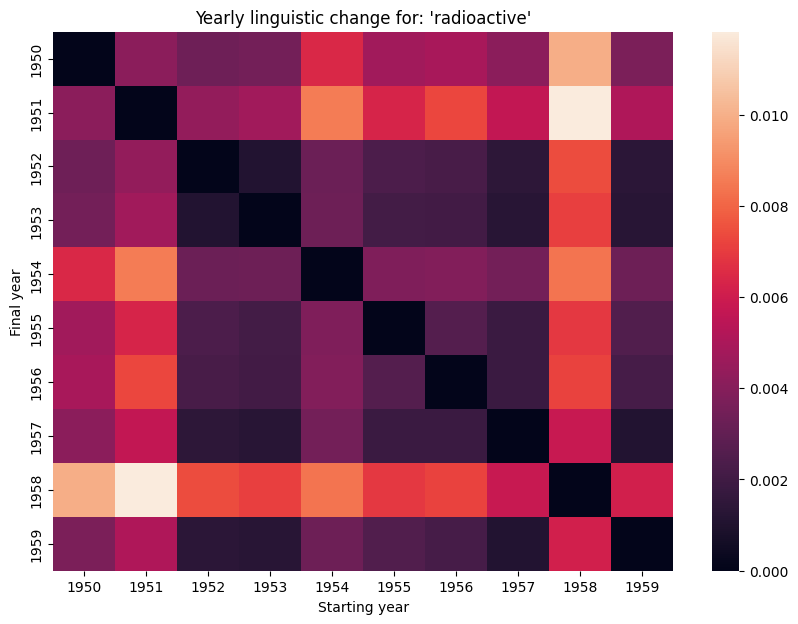

In [ ]:
targetWord = 'radioactive'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

area


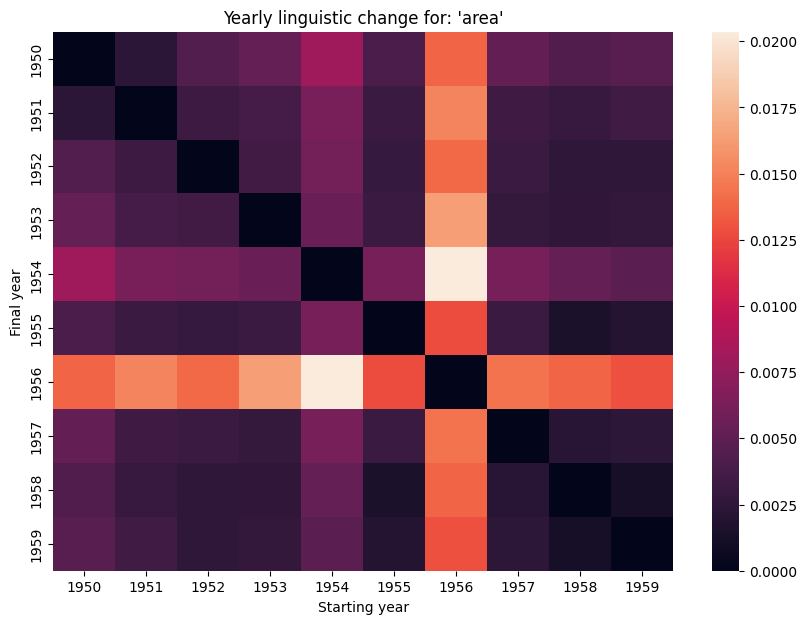

In [ ]:
targetWord = 'area'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))

    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        try:
            dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0].wv[word], axis = 0), np.expand_dims(embed.wv[word], axis = 0))[0,0])
        except:
            pass
    return np.mean(dists)

def findMostDivergent(embeddingsDict):
    original_words = comparedEmbeddings[1950][0].wv.index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.wv.index_to_key))
    words = set(original_words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)


In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 951 words to compare


The most divergent words are:

In [ ]:
wordDivergences[:20]

[('view', 0.999999717733336),
 ('application', 0.999999282083872),
 ('detail', 0.9999992307826308),
 ('analysis', 0.4096437457966807),
 ('consistent', 0.40922589674974086),
 ('low', 0.40518287841565337),
 ('hamiltonian', 0.3304787203018783),
 ('charge', 0.3161395451584156),
 ('found', 0.31411757973429316),
 ('chemical', 0.3133659305720613),
 ('activity', 0.3096330310631103),
 ('total', 0.3083859531123906),
 ('calculated', 0.3078164709766611),
 ('path', 0.30707537501447446),
 ('parity', 0.3064259527503047),
 ('follows', 0.3061744133789176),
 ('motion', 0.3060941062675724),
 ('f', 0.305222539484852),
 ('discussed', 0.30521335720672305),
 ('probably', 0.30470073992842545)]

And the least:

In [ ]:
wordDivergences[-20:]

[('units', 0.00363314151763916),
 ('scintillation', 0.003612661361694336),
 ('method', 0.003610867261886597),
 ('ferromagnetic', 0.0036017894744873047),
 ('covariant', 0.0035503625869750975),
 ('interest', 0.0035391867160797117),
 ('voltage', 0.0035223841667175295),
 ('domain', 0.003520643711090088),
 ('angular', 0.0035077393054962157),
 ('targets', 0.003493255376815796),
 ('systematic', 0.0034675121307373045),
 ('spectrum', 0.0034127593040466308),
 ('cm-1', 0.0032790958881378173),
 ('additional', 0.003272044658660889),
 ('tensor', 0.0032386481761932373),
 ('square', 0.0032058417797088622),
 ('collisions', 0.003199738264083862),
 ('g', 0.003012639284133911),
 ('transitions', 0.002928513288497925),
 ('presented', 0.002751326560974121)]

resolution


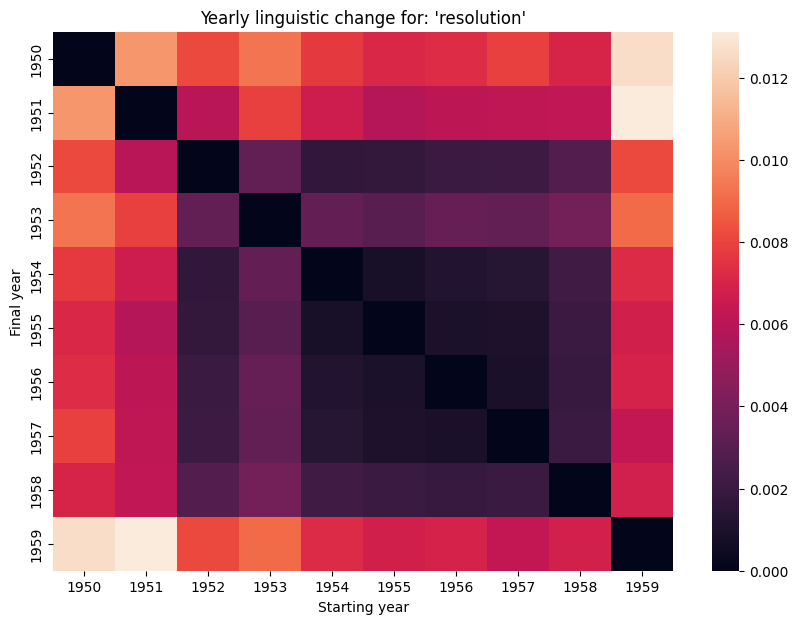

In [ ]:
targetWord = wordDivergences[-200][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

presented


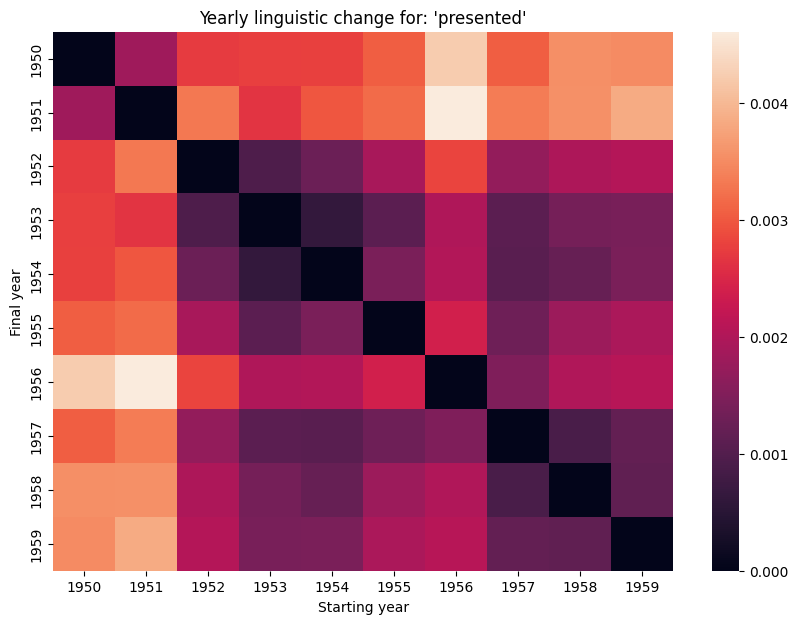

In [ ]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
##We only use a small data here so some of the results may not make sense. You can try the algorithm on your own data!

## COHA

COHA is a historial dataset so it ends up being a good choice to try the same analysis we just did across three different time periods.

We will be using the same data loading procedure as the last notebook, so go through the process to make sure you know what's going on.

In [ ]:
corpora_address = "COHA"

In [ ]:
coha_texts = lucem_illud.loadDavies(corpora_address, return_raw=True)

text_1810s_kso.zip
text_1820s_jsi.zip
text_1830s_bsu.zip
text_1840s_nsq.zip
text_1850s_jpr.zip
text_1860s_psi.zip
text_1870s_vuy.zip
text_1880s_azz.zip
text_1890s_jsq.zip
text_1900s_mse.zip
text_1910s_jue.zip
text_1920s_gte.zip
text_1930s_bie.zip
text_1940s_bsw.zip
text_1950s_ndz.zip
text_1960s_xus.zip
text_1970s_jfy.zip
text_1980s_bkk.zip
text_1990s_bsj.zip
text_2000s_scc.zip


Cool - let us now create our different epochs. This is an important step: I will be using the same 5 epochs I did in the DTM example, but you are recommended to play around with this. I will create a dataframe which logs the year and the genre.

In [ ]:
coha_df = pd.DataFrame(columns=["Year", "Genre", "Epoch", "normalized sents"])

In [ ]:
for article in coha_texts:
    genre, year, id_ = article.split("_")

    year = int(year)

    if year > 1810 and year < 1880:
        epoch = 0
    if year >= 1880 and year < 1913:
        epoch = 1
    if year >= 1913 and year < 1950:
        epoch = 2
    if year >= 1950 and year < 1990:
        epoch = 3
    if year >= 1990:
        epoch = 4

    try:
        if len(coha_texts[article][2]) < 1500000:
            coha_df.loc[id_] = [year, genre, epoch, lucem_illud.normalizeTokens(coha_texts[article][2].decode("utf-8"), lemma=False)]
    except TypeError:
        continue
    except IndexError:
        continue

We can now arrange our word embeddings by either year, genre, or epoch, and see how the words in each of those contexts change.

In [ ]:
rawEmbeddings_epoch = rawModels(coha_df, 'Epoch', text_column_name='normalized sents')

In [ ]:
# rawEmbeddings_genre = rawModels(coha_df, 'Genre', text_column_name='normalized sents')

We now have the raw embeddings for epoch and genre. You can test out the previous analysis on words of your choice.

In [ ]:
for epoch, embedding in enumerate(rawEmbeddings_epoch):
    model = rawEmbeddings_epoch[embedding]
    name = "embedding_epoch_" + str(epoch)
    model.save(name)

In [ ]:
# for embedding in rawEmbeddings_genre:
#     model = rawEmbeddings_genre[embedding]
#     name = "embedding_genre_" + embedding
#     model.save(name)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
def file_to_embeddings(address, kind):
    rawEmbeddings = {}
    for file in os.listdir(address):
        if "embedding_"+kind in file:
            e, kind_, kind_type = file.split("_")
            kind_type = eval(kind_type)
            rawEmbeddings[kind_type] = Word2Vec.load(file)
    return rawEmbeddings

In [ ]:
# rawEmbeddings_genre_load = file_to_embeddings(".", "genre")

In [ ]:
rawEmbeddings_epoch_load = file_to_embeddings(".", "epoch")

In [ ]:
rawEmbeddings_epoch_load.keys()

In [ ]:
rawEmbeddings_epoch, compared_epoch = compareModels(coha_df, 'Epoch', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_epoch_load)

In [ ]:
# rawEmbeddings_genre, compared_genre = compareModels(coha_df, 'Genre', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_genre_load)

You now have access to the epoch wise embeddings, and the code to train models genre wise (commented out). You can use the original embeddings, the compared embeddings and such to perform the analysis we did before.

## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space?

In [ ]:
import copy

In [ ]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    # base_vecs = calc_syn0norm(in_base_embed)
    # other_vecs = calc_syn0norm(in_other_embed)
    base_vecs= [in_base_embed.wv.get_vector(w,norm=True) for w in set(in_base_embed.wv.index_to_key)]
    other_vecs= [in_other_embed.wv.get_vector(w,norm=True) for w in set(in_other_embed.wv.index_to_key)]

    # just a matrix dot product with numpy
    m = np.array(other_vecs).T.dot(np.array(base_vecs))
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v)
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.vectors =(np.array(other_vecs)).dot(ortho)
    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count")  + m2.wv.get_vecattr(w, "count") ,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        new_arr = [m.wv.get_vector(w,norm=True) for w in common_vocab]

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        # old_vocab = m.wv.index_to_key
        new_vocab = []
        k2i={}
        for new_index,word in enumerate(common_vocab):
            new_vocab.append(word)
            k2i[word]=new_index
        m.wv.index_to_key=new_vocab
        m.wv.key_to_index=k2i
        m.wv.vectors=np.array(new_arr)

    return (m1,m2)

In [ ]:
path = '/content/gdrive/MyDrive/macss60000/week4/selected_articles_geodesign.xlsx'  # Make sure this is the correct path

In [ ]:
apsDF = pd.read_excel(path, index_col=0)  # Assuming the file is an Excel file, use read_excel instead of read_csv
apsDF.head(5)

Publication Type                                            Authors  \
ID                                                                       
1                 J   Yang, L; Iwami, M; Chen, YS; Wu, MB; van Dam, KH   
2                 J  Dong, SH; Wang, YD; Dou, MX; Gu, YY; Zhang, PQ...   
3                 J                   Wu, WS; Guo, JH; Ma, ZY; Zhao, K   
4                 J        Liu, SJ; Zhang, L; Long, Y; Long, Y; Xu, MH   
5                 J  Huang, JX; Obracht-Prondzynska, H; Kamrowska-Z...   

                                        Article Title  \
ID                                                      
1   Computational decision-support tools for urban...   
2   A Multiobjective Land Use Design Framework wit...   
3   Data-Driven Approach to Assess Street Safety: ...   
4   A New Urban Vitality Analysis and Evaluation F...   
5   The image of the City on social media: A compa...   

                                      Author Keywords  \
ID                                                      
1   Urban design; Urban planning; Decision -suppor...   
2   geo-big data; land use planning; multiobjectiv...   
3   street safety; multisource big data; assessmen...   
4   urban vitality; human activity recognition; mu...   
5   Kevin Lynch; City image; Social media analytic...   

                                        Keywords Plus  \
ID                                                      
1   VIRUS TRANSMISSION; EPIDEMIC; NETWORK; CITIES;...   
2   GENETIC ALGORITHM; PROGRAMMING-MODEL; OPTIMIZA...   
3   BUILT ENVIRONMENT; NEIGHBORHOOD SAFETY; PERCEI...   
4   ACTIVITY PATTERNS; LAND-USE; REGRESSION; BEHAV...   
5                                                 NaN   

                                             Abstract  \
ID                                                      
1   The COVID-19 pandemic highlighted the need for...   
2   Transit-oriented development (TOD) is among th...   
3   Safety is an important quality of street space...   
4   A quantitative study of urban vitality brings ...   
5   The Image of the City by Kevin Lynch is a land...   

                                            Addresses  \
ID                                                      
1   [Yang, Liu] Southeast Univ, Sch Architecture, ...   
2   [Dong, Shihai; Wang, Yandong; Dou, Mingxuan; G...   
3   [Wu, Wanshu] Qingdao Univ Technol, Coll Archit...   
4   [Liu, Shaojun; Zhang, Ling; Long, Yi; Long, Ya...   
5   [Huang, Jianxiang; Sun, Yiming] Univ Hong Kong...   

                                         Affiliations  \
ID                                                      
1   Southeast University - China; Southeast Univer...   
2   Wuhan University; East China University of Tec...   
3   Qingdao University of Technology; Huaqiao Univ...   
4                           Nanjing Normal University   
5   University of Hong Kong; Fahrenheit Universiti...   

                                    Reprint Addresses  \
ID                                                      
1   Yang, L (corresponding author), Southeast Univ...   
2   Wang, YD (corresponding author), Wuhan Univ, S...   
3   Zhao, K (corresponding author), Qingdao Univ, ...   
4   Long, Y (corresponding author), Nanjing Normal...   
5   Li, LS (corresponding author), City Univ Hong ...   

                                      Email Addresses  ...  \
ID                                                     ...   
1                              yangliu2020@seu.edu.cn  ...   
2   shihaid@whu.edu.cn; ydwang@whu.edu.cn; mxdou@w...  ...   
3                                  zhaokai@qdu.edu.cn  ...   
4   161301019@stu.njnu.edu.cn; lingzhang@njnu.edu....  ...   
5                                                 NaN  ...   

                                    Publisher Address       ISSN      eISSN  \
ID                                                                            
1   THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...  0305-9006  1873-4510   
2      ST AL

In [ ]:
apsDF['tokenized_sents'] = apsDF['Abstract'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
apsDF['normalized_sents'] = apsDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
apsDF.head(20)

Publication Type                                            Authors  \
ID                                                                       
1                 J   Yang, L; Iwami, M; Chen, YS; Wu, MB; van Dam, KH   
2                 J  Dong, SH; Wang, YD; Dou, MX; Gu, YY; Zhang, PQ...   
3                 J                   Wu, WS; Guo, JH; Ma, ZY; Zhao, K   
4                 J        Liu, SJ; Zhang, L; Long, Y; Long, Y; Xu, MH   
5                 J  Huang, JX; Obracht-Prondzynska, H; Kamrowska-Z...   
6                 J        Gong, LS; Jin, MH; Liu, Q; Gong, YX; Liu, Y   
7                 J                  Peng, ZH; Wang, R; Liu, LB; Wu, H   
8                 S  Burini, F; Ciriello, DE; Ghisalberti, A; Psail...   
9                 J  Ji, HH; Qing, LB; Han, LM; Wang, ZY; Cheng, YQ...   
10                J  Deng, XD; Liu, Y; Gao, F; Liao, SY; Zhou, F; C...   
11                J  Li, X; Hijazi, I; Koenig, R; Lv, ZH; Zhong, C;...   
12                J  Zhai, W; Bai, XY; Shi, Y; Han, Y; Peng, ZR; Gu...   
13                J              Haklay, M; Jankowski, P; Zwolinski, Z   
14                J                                         Schiewe, J   
15                J          He, ZJ; Wang, ZP; Xie, Z; Wu, L; Chen, ZL   
16                J  Luo, SH; Liu, Y; Du, MY; Gao, SY; Wang, PF; Li...   
17                J  Wang, MY; He, YJ; Meng, H; Zhang, Y; Zhu, B; M...   
18                J       Yang, LC; Liu, JX; Liang, Y; Lu, Y; Yang, HT   
19                J                  Bacharidis, K; Sarri, F; Ragia, L   
20                J                       Yang, CH; Liu, TT; Zhang, ST   

                                        Article Title  \
ID                                                      
1   Computational decision-support tools for urban...   
2   A Multiobjective Land Use Design Framework wit...   
3   Data-Driven Approach to Assess Street Safety: ...   
4   A New Urban Vitality Analysis and Evaluation F...   
5   The image of the City on social media: A compa...   
6   Identifying Urban Residents' Activity Space at...   
7   Exploring Urban Spatial Features of COVID-19 T...   
8   The Urban Nexus Project: When Urban Mobility A...   
9   A New Data-Enabled Intelligence Framework for ...   
10  Spatial Distribution and Mechanism of Urban Oc...   
11  Assessing Essential Qualities of Urban Space w...   
12  Beyond Word2vec: An approach for urban functio...   
13  SELECTED MODERN METHODS AND TOOLS FOR PUBLIC P...   
14  Task-Oriented Visualization Approaches for Lan...   
15  Multiscale analysis of the influence of street...   
16  The Influence of Spatial Grid Division on the ...   
17  Assessing Street Space Quality Using Street Vi...   
18  Spatially Varying Effects of Street Greenery o...   
19  3D Building Facade Reconstruction Using Deep L...   
20  Using Flickr Data to Understand Image of Urban...   

                                      Author Keywords  \
ID                                                      
1   Urban design; Urban planning; Decision -suppor...   
2   geo-big data; land use planning; multiobjectiv...   
3   street safety; multisource big data; assessmen...   
4   urban vitality; human activity recognition; mu...   
5   Kevin Lynch; City image; Social media analytic...   
6   activity space; multiple geographic scales; mo...   
7   COVID-19; social media data; sina weibo; spati...   
8                                                 NaN   
9   urban space perception; deep learning; big dat...   
10  urban modeling; residents' occupation mixture;...   
11  urban form; Geographical Information System; w...   
12  Urban Functional Regions; Place2vec; POIs; Geo...   
13  Geoweb methods; public participation; urban pl...   
14  change analysis; visualization; landscape anal...   
15  Street built environment; Crime prevention; Go...   
16  spatial grid; point of interest; function iden...   
17  street view imagery; urban function; street vi...   
18  street greenery; street view ima

In [ ]:
apsDF

Publication Type                                            Authors  \
ID                                                                       
1                 J   Yang, L; Iwami, M; Chen, YS; Wu, MB; van Dam, KH   
2                 J  Dong, SH; Wang, YD; Dou, MX; Gu, YY; Zhang, PQ...   
3                 J                   Wu, WS; Guo, JH; Ma, ZY; Zhao, K   
4                 J        Liu, SJ; Zhang, L; Long, Y; Long, Y; Xu, MH   
5                 J  Huang, JX; Obracht-Prondzynska, H; Kamrowska-Z...   
..              ...                                                ...   
57                J                Zhang, SY; Liu, NX; Ma, BN; Yan, SR   
58                J                   Xu, F; Ho, HC; Chi, GQ; Wang, ZQ   
59                J                  Guo, Y; Su, JG; Dong, Y; Wolch, J   
60                J                            Sharmeen, N; Houston, D   
61                J  Wang, HR; Zhang, HP; Zhu, H; Zhao, F; Jiang, S...   

                                        Article Title  \
ID                                                      
1   Computational decision-support tools for urban...   
2   A Multiobjective Land Use Design Framework wit...   
3   Data-Driven Approach to Assess Street Safety: ...   
4   A New Urban Vitality Analysis and Evaluation F...   
5   The image of the City on social media: A compa...   
..                                                ...   
57  The effects of street environment features on ...   
58  Abandoned rural residential land: Using machin...   
59  Application of land use regression techniques ...   
60  Urban Form, Socio-Demographics, Attitude and A...   
61  A multivariate hierarchical regionalization me...   

                                      Author Keywords  \
ID                                                      
1   Urban design; Urban planning; Decision -suppor...   
2   geo-big data; land use planning; multiobjectiv...   
3   street safety; multisource big data; assessmen...   
4   urban vitality; human activity recognition; mu...   
5   Kevin Lynch; City image; Social media analytic...   
..                                                ...   
57  road running; road running intensity; running-...   
58  Rural residential land; Land abandonment; Mach...   
59  Land use regression; Geographic information sy...   
60  variability of activity space; urban form; soc...   
61  Regionalization; spatiotemporal cube; geograph...   

                                        Keywords Plus  \
ID                                                      
1   VIRUS TRANSMISSION; EPIDEMIC; NETWORK; CITIES;...   
2   GENETIC ALGORITHM; PROGRAMMING-MODEL; OPTIMIZA...   
3   BUILT ENVIRONMENT; NEIGHBORHOOD SAFETY; PERCEI...   
4   ACTIVITY PATTERNS; LAND-USE; REGRESSION; BEHAV...   
5                                                 NaN   
..                                                ...   
57  PHYSICAL-ACTIVITY; BUILT ENVIRONMENT; ATTRIBUT...   
58  AGRICULTURAL LAND; DRIVING FORCES; OUT-MIGRATI...   
59  LONG-TERM EXPOSURE; ROADSIDE VEGETATION BARRIE...   
60  PHYSICAL-ACTIVITY; BUILT ENVIRONMENT; TIME; GE...   
61                            AIR-POLLUTION; EXPOSURE   

                                             Abstract  \
ID                                                      
1   The COVID-19 pandemic highlighted the need for...   
2   Transit-oriented development (TOD) is among th...   
3   Safety is an important quality of street space...   
4   A quantitative study of urban vitality brings ...   
5   The Image of the City by Kevin Lynch is a land...   
..                                                ...   
57  Urban streets provide environment for road run...   
58  Rural residential land has been increasingly a...   
59  The land cover types in a 4 km by 4 km space c...   
60  Very few studies have addressed the gap in lit...   
61  In GIScience, the regionalization method is wi...   

                                            Addresses  \
ID             

In [ ]:
apsD2V = gensim.models.word2vec.Word2Vec.load('/content/apsW2V')

In [ ]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [ ]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(apsDF, 'Publication Year')

In [ ]:
rawEmbeddings.keys()

dict_keys([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
rawEmbeddings

{2016: <gensim.models.word2vec.Word2Vec at 0x7bf34b4f4130>,
 2017: <gensim.models.word2vec.Word2Vec at 0x7bf34b16d090>,
 2018: <gensim.models.word2vec.Word2Vec at 0x7bf34ab43af0>,
 2019: <gensim.models.word2vec.Word2Vec at 0x7bf34b3b1a50>,
 2020: <gensim.models.word2vec.Word2Vec at 0x7bf34b16caf0>,
 2021: <gensim.models.word2vec.Word2Vec at 0x7bf34b4f5510>,
 2022: <gensim.models.word2vec.Word2Vec at 0x7bf34b23ded0>,
 2023: <gensim.models.word2vec.Word2Vec at 0x7bf34b16f010>}

In [ ]:
words_in_2016_model = list(rawEmbeddings[2016].wv.key_to_index.keys())
words_in_2016_model

['datum']

In [ ]:
for year, model in rawEmbeddings.items():
    print(f"Words in {year} model:")
    words_in_model = list(model.wv.key_to_index.keys())
    print(words_in_model)

Words in 2016 model:
['datum']
Words in 2017 model:
['datum']
Words in 2018 model:
['datum']
Words in 2019 model:
['datum']
Words in 2020 model:
['datum']
Words in 2021 model:
['datum']
Words in 2022 model:
['datum']
Words in 2023 model:
['datum']


In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0].wv[word], axis = 0),
                                                                             np.expand_dims(embed.wv[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

In [ ]:
def check_and_get_divergence(word, embeddings_dict):
    # Check if the word is in the dictionary
    if word in embeddings_dict:
        # If the word is in the dictionary, proceed with the existing function's logic
        return get_divergence_df(word, embeddings_dict)
    else:
        # If the word is not in the dictionary, handle the case (e.g., return an error message or an empty DataFrame)
        return f"Key '{word}' not present in the embeddings dictionary."

# Note: The function `get_divergence_df` is assumed to be the function the user already has, which calculates the divergence DataFrame.
# The embeddings_dict is a placeholder for the actual embeddings dictionary the user has.

# Since the actual `get_divergence_df` function is not provided, below is a placeholder for demonstration purposes.
# The user should replace this with their actual function.

def get_divergence_df(word, embeddings_dict):
    # Placeholder logic for demonstration
    # Actual function logic should be implemented by the user
    return f"Divergence DataFrame for '{word}'"

# Example usage (the 'comparedEmbeddings' should be replaced by the actual embeddings dictionary the user has)
target_word = 'datum'
result = check_and_get_divergence(target_word, comparedEmbeddings)
print(result)

Key 'datum' not present in the embeddings dictionary.


In [ ]:
def list_embedding_keys(embeddings_dict):
    return list(embeddings_dict.keys())

# The user would need to pass their actual embeddings dictionary to this function to get the list of words.
# For example:

existing_words = list_embedding_keys(comparedEmbeddings)
print(existing_words)

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


datum


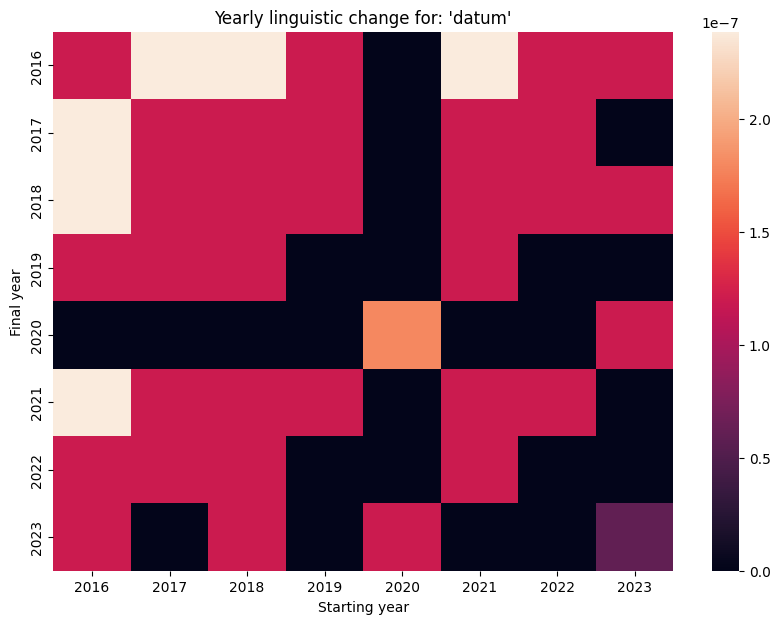

In [ ]:
targetWord = 'datum'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))

    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        try:
            dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0].wv[word], axis = 0), np.expand_dims(embed.wv[word], axis = 0))[0,0])
        except:
            pass
    return np.mean(dists)

def findMostDivergent(embeddingsDict):
    original_words = comparedEmbeddings[2016][0].wv.index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.wv.index_to_key))
    words = set(original_words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 1 words to compare


In [ ]:
wordDivergences[:20]

[('datum', -1.4901161193847656e-07)]

In [ ]:
wordDivergences[-20:]

[('datum', -1.4901161193847656e-07)]

Not enough words to compare.
datum


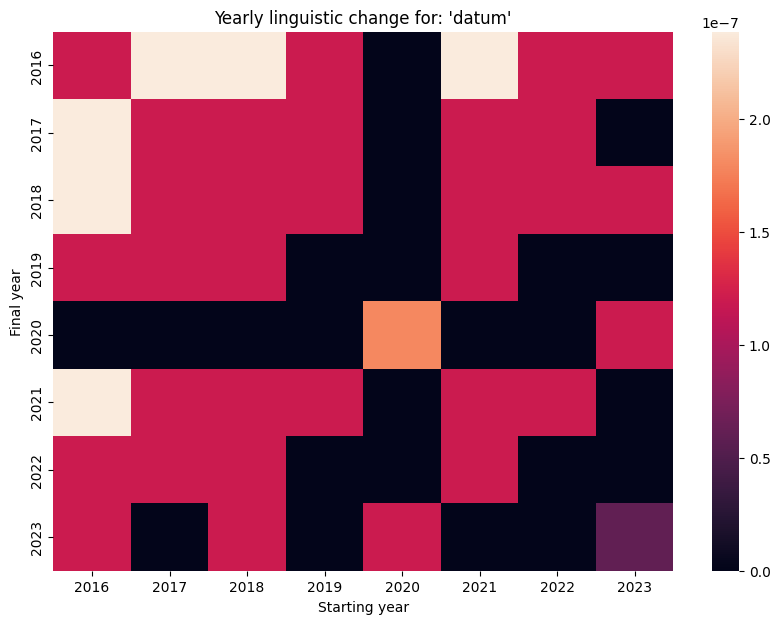

In [ ]:
if len(wordDivergences) > 1:
    targetWord = wordDivergences[1][0]
else:
    print("Not enough words to compare.")

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
corpora_address = "/content/gdrive/MyDrive/60000/COHA"

In [ ]:
coha_texts = lucem_illud.loadDavies(corpora_address, return_raw=True)

text_1990s_bsj.zip
text_2000s_scc.zip


In [ ]:
coha_df = pd.DataFrame(columns=["Year", "Genre", "Epoch", "normalized sents"])

In [ ]:
for article in coha_texts:
    genre, year, id_ = article.split("_")

    year = int(year)

    if year > 1810 and year < 1880:
        epoch = 0
    if year >= 1880 and year < 1913:
        epoch = 1
    if year >= 1913 and year < 1950:
        epoch = 2
    if year >= 1950 and year < 1990:
        epoch = 3
    if year >= 1990:
        epoch = 4

    try:
        if len(coha_texts[article][2]) < 1500000:
            coha_df.loc[id_] = [year, genre, epoch, lucem_illud.normalizeTokens(coha_texts[article][2].decode("utf-8"), lemma=False)]
    except TypeError:
        continue
    except IndexError:
        continue

In [ ]:
rawEmbeddings_epoch = rawModels(coha_df, 'Epoch', text_column_name='normalized sents')

There is much more we do not have time to cover on word embeddings. If you are interested in other ways to align word embeddings, take a look at the [Dynamic Word Embeddings (DTM) section from the Thinking with Deep Learning course](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=COS_n2RFCJNk) or using the more recent [Temporal Word Embeddings with a Compass (TWEC) package](https://github.com/valedica/twec). There is also a useful section on [debiasing word embeddings](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=JHQ--EsWoxGM), such as the famous, ["Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings"](https://arxiv.org/abs/1607.06520) paper. Below, we include an optional section on topic modeling with word embeddings, which could be useful for final projects.

## Optional: Topic modeling with word embeddings

Recently computer scientists have developed methods to cluster word embeddings, which can be viewed as a topic model, an embedding-based version of conventional topic models that use the document-term matrix (e.g., LDA). One method is Discourse Atoms, first described by Princeton NLP researchers ([Arora et al. 2018](https://arxiv.org/abs/1601.03764)). This uses k-SVD, a generalization of the k-means clustering algorithm to identify topic-like vectors in the n-dimensional word embedding space. Below is code adapted from the first social science paper using Discourse Atoms, [Arseniev-Koehler et al. 2021](https://osf.io/preprints/socarxiv/nkyaq/). It takes as input _gensim_ word vectors.

You are not required to implement this, but for class projects or your own research, this can be more useful than conventional topic models. It runs faster, produces more detailed topics, and in general makes use of more information (i.e., word order within a document) than do conventional topic models. Note there are at least 4 other papers with methods for word embedding clusters:

- Xun, Li, Zhao, Gao, and Zhang 2017: [multivariate Gaussian distributions](https://www.ijcai.org/proceedings/2017/588)
- Dieng, Ruiz, and Blei 2019: ["Embedding Topic Model (ETM)"](https://arxiv.org/abs/1907.04907)
- Angelov 2020: ["Top2Vec"](https://arxiv.org/abs/2008.09470)
- Sia, Dalmia, and Mielke 2020: [(spherical) k-means, k-medoids, von Mises-Fisher Models, Gaussian Mixture Models](https://arxiv.org/abs/2004.14914)

Let's implement the Discourse Atoms method.

In [ ]:
from gensim.test.utils import datapath
import re
import string, re
import cython

In [ ]:
# The ksvd package has a convenient Approximate k-SVD function.
!pip install ksvd

In [ ]:
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from random import seed, sample
from ksvd import ApproximateKSVD #pip or conda install ksvd #this is key!

In [ ]:
import pickle

In [ ]:
import math

In [ ]:
# Load a gensim word2vec model
w2v = senReleasesW2V

NameError: name 'senReleasesW2V' is not defined

#### k-SVD

We then perform a K-SVD on the word embedding matrix to learn topics in such a way where each word-vector is represented as a spare linear combination of topics. To generate a good representation of the original word vector space, we want to minimize the difference between our word vectors and the vectors generated as a linear combination of topics.




In [ ]:
#### TRAIN MODEL:

#n_comp: Number of topics (i.e., atoms, or dictionary elements)
#n_nonzeros: Number of nonzero coefficients to target (how many atoms each word can load onto)

##create the saving folder if you need!!

def do_aksvd(w2vmodel, n_comp, n_nonzeros, save=False, savelocation='/content/aksvd_models/'):
    #https://github.com/nel215/ksvd #takes about 2 min on Alina's laptop for 30 atoms
    aksvd_t = ApproximateKSVD(n_components=n_comp, transform_n_nonzero_coefs=n_nonzeros) #also may adjuste n iter which is default at 10, and tolerance for error which is default at  tol=1e-6 #n_components is number of discourse atoms, since vocab size is smallish, keep this fewer. transform_n is the number of atoms (components) that a word can be a linear combo of
    dictionary_t = aksvd_t.fit(w2vmodel.wv.vectors).components_ # Dictionary is the matrix of discourse atoms.
    alpha_t = aksvd_t.transform(w2vmodel.wv.vectors) #get the alphas, which are the "weights" of each word on a discourse atoms

    if save==True:
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_aksvd_nvdrsdf20','wb')
        pickle.dump(aksvd_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' +str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_dictionary_nvdrsdf20','wb')
        pickle.dump(dictionary_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_alpha_nvdrsdf20','wb')
        pickle.dump(alpha_t,outfile)
        outfile.close()
    return(dictionary_t, alpha_t)

Two quick quality checks. These are useful to choose the number of atoms in the dictionary (i.e., number of topics): $R^2$ and Topic Diversity

Useful to look at product of the two since $R^2$ tends to increase with higher # topics, as Topic Diversity decreases. Intuition: more topics can better explain the original semantic space, but also then these topics are less distinct from one another. As a result, we typically want a balance between the two.

In [ ]:
def reconst_qual(w2vmodel, dictionary_mat, alpha_mat):
    #reconstruct the word vectors
    reconstructed = alpha_mat.dot(dictionary_mat) #reconstruct word vectors and add back in mean(?). but note that reconstructed norm is still around 0-1, not 1, is that an issue?
    #e1 = norm(w2vmodel.wv.vectors - reconstructed) #total reconstruction error, larger means MORE error. norm as specified here takes frobenius norm of error matrix.


    #total VARIANCE in the data: sum of squares
    squares3= w2vmodel.wv.vectors-np.mean(w2vmodel.wv.vectors, axis=1).reshape(-1,1) #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sst3= np.sum([i.dot(i) for i in squares3] ) #same as below

    sst3= np.sum(np.square(squares3))


    #total sum of squared ERRORS/residuals
    e3= [reconstructed[i]-w2vmodel.wv.vectors[i] for i in range(0,len(w2vmodel.wv.vectors))]  #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sse3= np.sum([i.dot(i) for i in e3] ) #same as below
    sse3= np.sum(np.square(e3))

    #R^2: 1- (SSE / SST )
    r2= 1- (sse3 /  sst3) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error


    #compute root mean square error
    rmse=  math.sqrt(np.mean(np.square(e3)))



    return(sse3, rmse, r2) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

#### Inferring topics from document

We now use a similar approach to what we saw a little earlier, where we inverted our generative model to see which documents belong to which class - we do the same now, but with discourse atoms instead of the whole model. This process tells us the topic most likely to have generated a specific context (document).



In [ ]:
#topic diversity (% unique words among total closest 25 words to each atom)
def topic_diversity(w2vmodel, dictionary_mat, top_n=25):

    topwords=[] #list of list, each innter list includes top N words in that topic

    for i in range(0, len(dictionary_mat)): #set to number of total topics
        topwords.extend([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary_mat[i],topn=top_n)]) #set for top N words
        #print(w2vmodel.wv.similar_by_vector(dictionary[i],topn=N))

    uniquewords= set(topwords)
    diversity = len(uniquewords)/len(topwords)
    return(diversity)

In [ ]:
##make sure to create a saving path first

dictionary, alpha = do_aksvd(w2v, 150, 5, save=True)

In [ ]:
topic_diversity(w2v, dictionary, top_n=25)

0.8034666666666667

In [ ]:
reconst_qual(w2v, dictionary, alpha)


(16714.18224838863, 0.11030937541961874, 0.868297053345052)

In [ ]:
#loading back in the model pieces if not already in

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_dictionary_nvdrsdf20','rb')
# dictionary=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_aksvd_nvdrsdf20','rb')
# aksvd=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_alpha_nvdrsdf20','rb')
# alpha=pickle.load(infile)
# infile.close()

In [ ]:
for i in range(0, len(dictionary)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in w2v.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')


Discourse_Atom 0
['ends', 'desperately', 'daunting', 'faces', 'obviously', 'facing', 'desperate', 'challenge', 'needs', 'face', 'struggling', 'faced', 'heal', 'tackle', 'urgent', 'struggle', 'challenges', 'dire', 'worse', 'unmet', 'crisis', 'safer', 'confront', 'solve', 'focus']


Discourse_Atom 1
['forget', 'hopes', 'feel', 'talk', 'stood', 'forever', 'minds', 'moment', 'mind', 'afraid', 'happened', 'remember', 'alive', 'tall', 'lot', 'got', 'pledge', 'knew', 'patriotism', 'forgotten', 'truth', 'things', 'reminded', 'fathers', 'hearts']


Discourse_Atom 2
['house', 'supremacist', 'collar', 'party', 'democrats', 'republican', 'congress', 'independents', 'houses', 'summaries', 'democratic', 'partisan', 'ryan', 'opponent', 'disappear', 'compromise', 'slogan', 'culmination', 'opposition', 'black', 'republicans', 'skip', 'cynical', 'mckeon', 'negotiators']


Discourse_Atom 3
['essential', 'tools', 'maintain', 'strengthen', 'effectively', 'necessary', 'adequate', 'enable', 'securing', 'tool

In [ ]:
# for a specific atom, e.g., 112th atom look at 25 most similar words:
w2v.wv.similar_by_vector(dictionary[112],topn=25)

[('funds', 0.7516657114028931),
 ('funding', 0.6887559294700623),
 ('resources', 0.6219789385795593),
 ('assistance', 0.6081899404525757),
 ('efforts', 0.575427770614624),
 ('reimbursements', 0.5240765810012817),
 ('effort', 0.5111767053604126),
 ('communities', 0.5077028274536133),
 ('desperately', 0.5070760250091553),
 ('responders', 0.5020491480827332),
 ('match', 0.49038416147232056),
 ('deliver', 0.4859146773815155),
 ('grants', 0.4784278869628906),
 ('declaration', 0.47553300857543945),
 ('commonsense', 0.47147828340530396),
 ('governments', 0.4701017439365387),
 ('support', 0.4608587920665741),
 ('programs', 0.4598115384578705),
 ('rebuild', 0.4564478099346161),
 ('flexibility', 0.4534948468208313),
 ('initiative', 0.4531988799571991),
 ('gear', 0.45291605591773987),
 ('firefighting', 0.45242419838905334),
 ('agencies', 0.45125699043273926),
 ('evacuees', 0.4423292577266693)]

In [ ]:
#useful relevant code:
w2v.wv.index_to_key[3452]

'balances'

In [ ]:
w2v.wv.most_similar('divorced', topn=15)

[('pregnant', 0.8717613816261292),
 ('married', 0.8586174845695496),
 ('disproportionately', 0.8537034392356873),
 ('color', 0.839481770992279),
 ('minorities', 0.8368760347366333),
 ('sore', 0.8331732153892517),
 ('couples', 0.8202372193336487),
 ('babies', 0.8103613257408142),
 ('ages', 0.7914664149284363),
 ('shouldered', 0.788785994052887),
 ('everyday', 0.7813878655433655),
 ('aged', 0.7813552021980286),
 ('caregivers', 0.7750584483146667),
 ('spouse', 0.770943820476532),
 ('bankrupt', 0.7709380984306335)]

In [ ]:
np.where(alpha[w2v.wv.key_to_index['divorced']] != 0) #get index where the loading of a word onto discourse atoms is not 0

(array([ 22,  37, 105, 110, 134]),)

In [ ]:
w2v = BurnoutW2V

NameError: name 'BurnoutW2V' is not defined